# Token Benchmark Example Analysis
The following is an example of the analysis that can be done on individual responses that are saved when running `token_benchmark_ray.py` with the flag `--results-dir` which enables the saving of all responses.

In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
def get_final_metrics_df(valid_df):
    final_df = pd.DataFrame()
    final_df["number_input_tokens"] = valid_df["number_input_tokens"]
    final_df["number_output_tokens"] = valid_df["number_output_tokens"]
    final_df["number_total_tokens"]  = valid_df["number_total_tokens"]
    final_df["concurrent_user"] = valid_df["concurrent_user"]
    
    # server metrics
    final_df["ttft_server_s"] = valid_df["ttft_server_s"]
    final_df["end_to_end_latency_server_s"] = valid_df["end_to_end_latency_server_s"]
    final_df["generation_throughput_server"] = valid_df["request_output_throughput_server_token_per_s"]
    
    # client metrics
    final_df["ttft_s"] = valid_df["ttft_s"]
    final_df["end_to_end_latency_s"] = valid_df["end_to_end_latency_s"]
    final_df["generation_throughput"] = valid_df["request_output_throughput_token_per_s"]
    return final_df

# Using COE

In [37]:
def show_distributions(models, data_path, input_tokens=1000, output_tokens=1000):
    
    fig,ax = plt.subplots(nrows=len(models),ncols=4,figsize=(28,3))
    
    for idx, model in enumerate(models):
        df_user = pd.read_json(f"{data_path}{model.replace('/','-').replace('.','-')}_{input_tokens}_{output_tokens}_1_stream_individual_responses.json")
        df_user['concurrent_user'] = 1
        final_df = get_final_metrics_df(df_user)
        
        df_server = final_df[['ttft_server_s','number_input_tokens', 'number_total_tokens', 'generation_throughput_server','number_output_tokens', 'end_to_end_latency_server_s']].copy()
        df_server = df_server.rename(columns = {'ttft_server_s': 'ttft', 'generation_throughput_server': 'generation_throughput', 'end_to_end_latency_server_s': 'e2e_latency'})
        df_server['type'] = 'Server side'               

        df_client = final_df[['ttft_s','number_input_tokens', 'number_total_tokens', 'generation_throughput','number_output_tokens', 'end_to_end_latency_s']].copy()
        df_client = df_client.rename(columns = {'ttft_s': 'ttft', 'end_to_end_latency_s': 'e2e_latency'})
        df_client['type'] = 'Client side'               

        df_ttft_throughput_latency = pd.concat([df_server, df_client], ignore_index=True)
        
        fig.suptitle(f'No Output Tokens, TTFT, Throughput and E2E Latency distributions for {model}')
        sns.boxplot(data=df_ttft_throughput_latency, x="number_output_tokens", y="type", ax=ax[idx+0])
        sns.boxplot(data=df_ttft_throughput_latency, x="ttft", y="type", ax=ax[idx+1])
        sns.boxplot(data=df_ttft_throughput_latency, x="generation_throughput", y="type", ax=ax[idx+2])
        sns.boxplot(data=df_ttft_throughput_latency, x="e2e_latency", y="type", ax=ax[idx+3]);

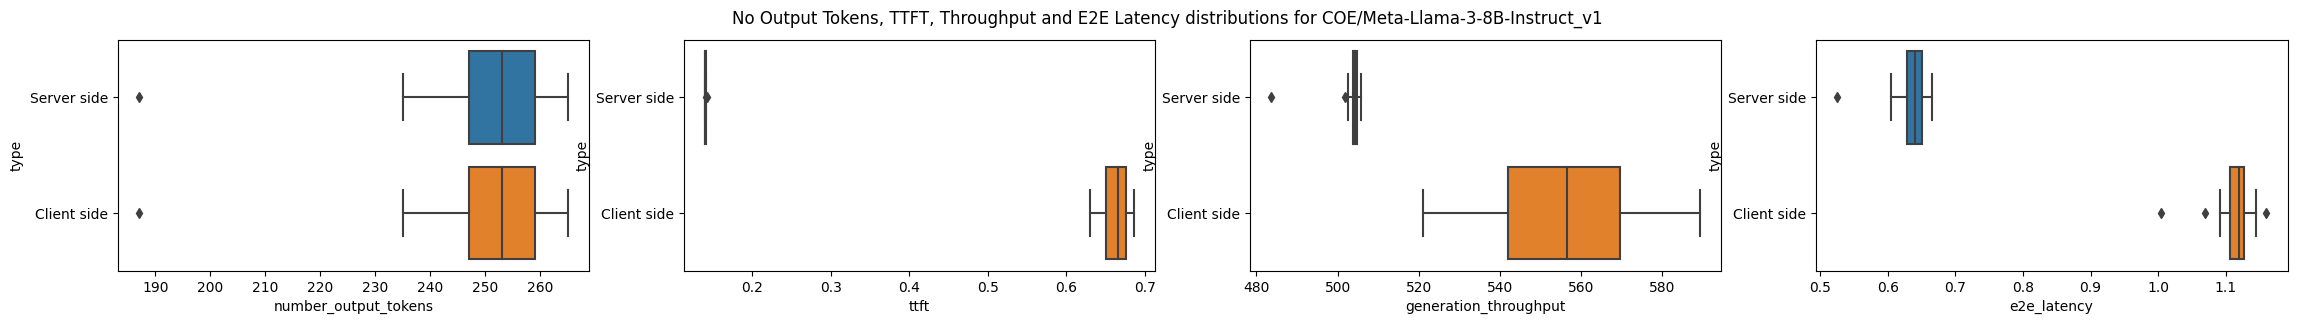

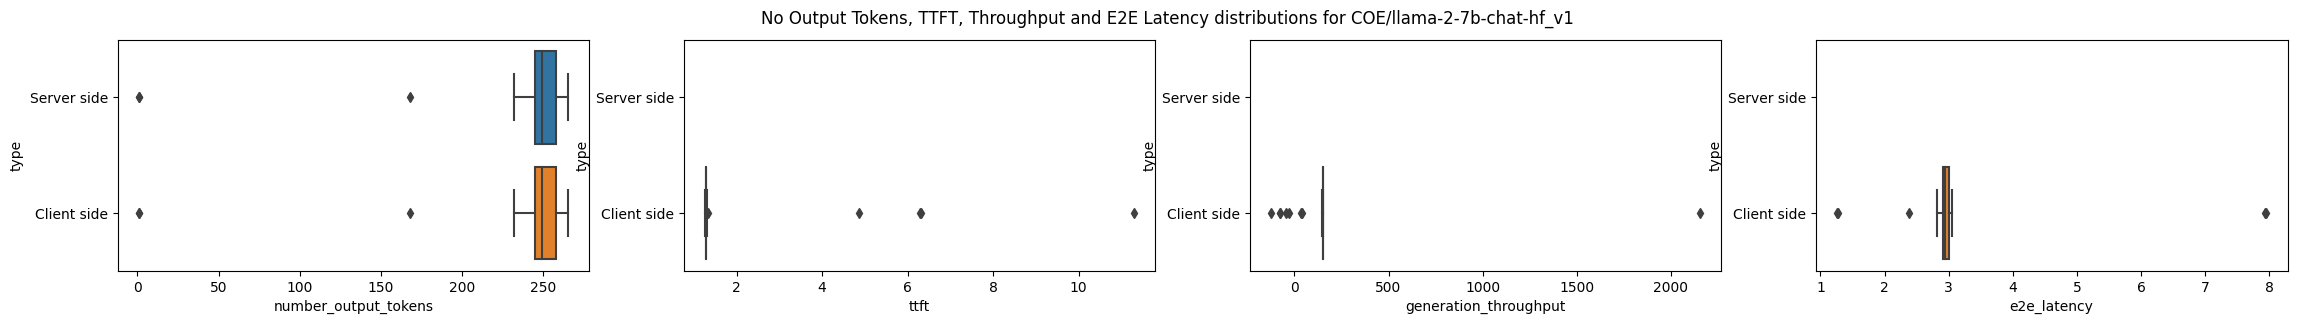

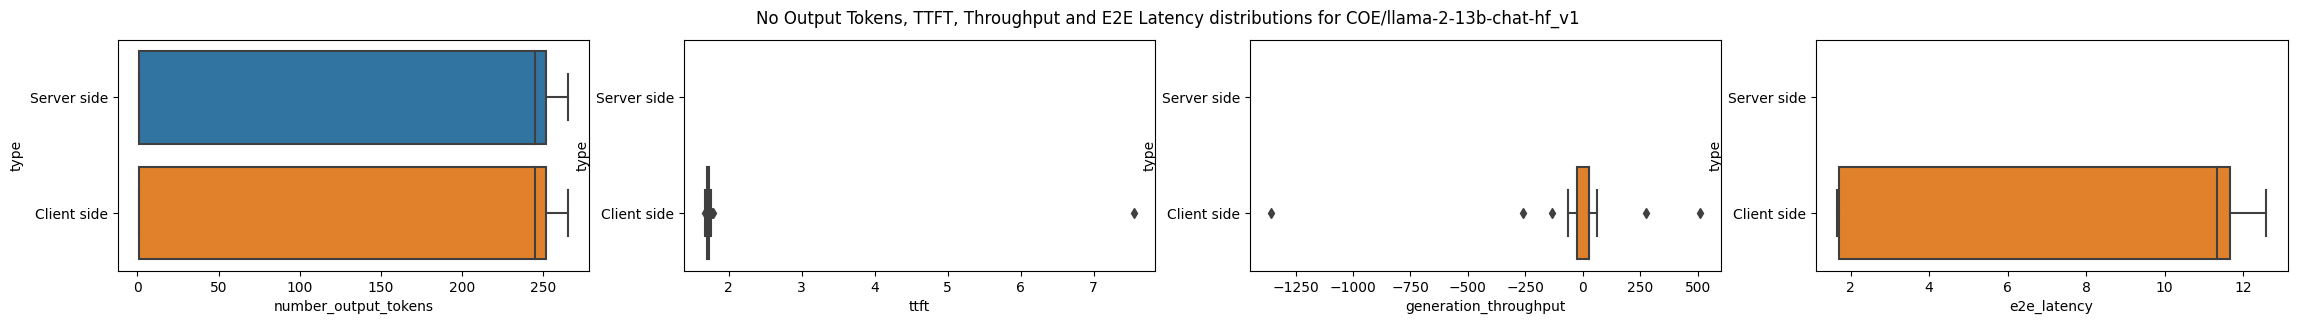

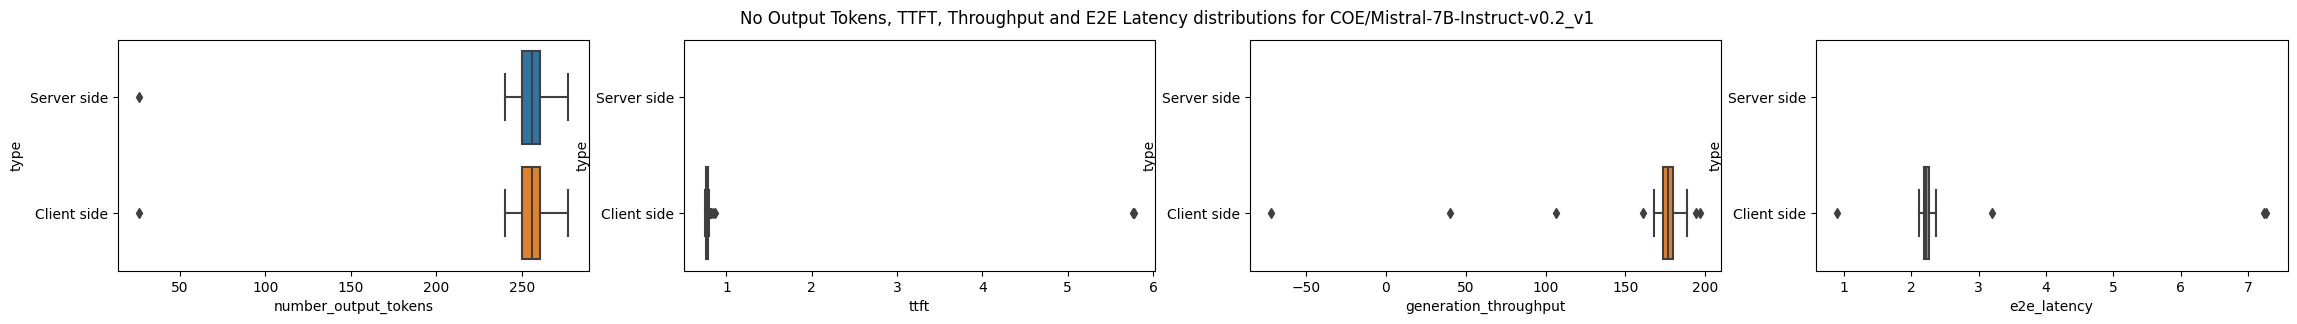

In [30]:
models = ['COE/Meta-Llama-3-8B-Instruct_v1','COE/llama-2-7b-chat-hf_v1','COE/llama-2-13b-chat-hf_v1','COE/Mistral-7B-Instruct-v0.2_v1']
show_distributions(models, data_path='../data/results/llmperf/debug_COE/', input_tokens=1500, output_tokens=250)

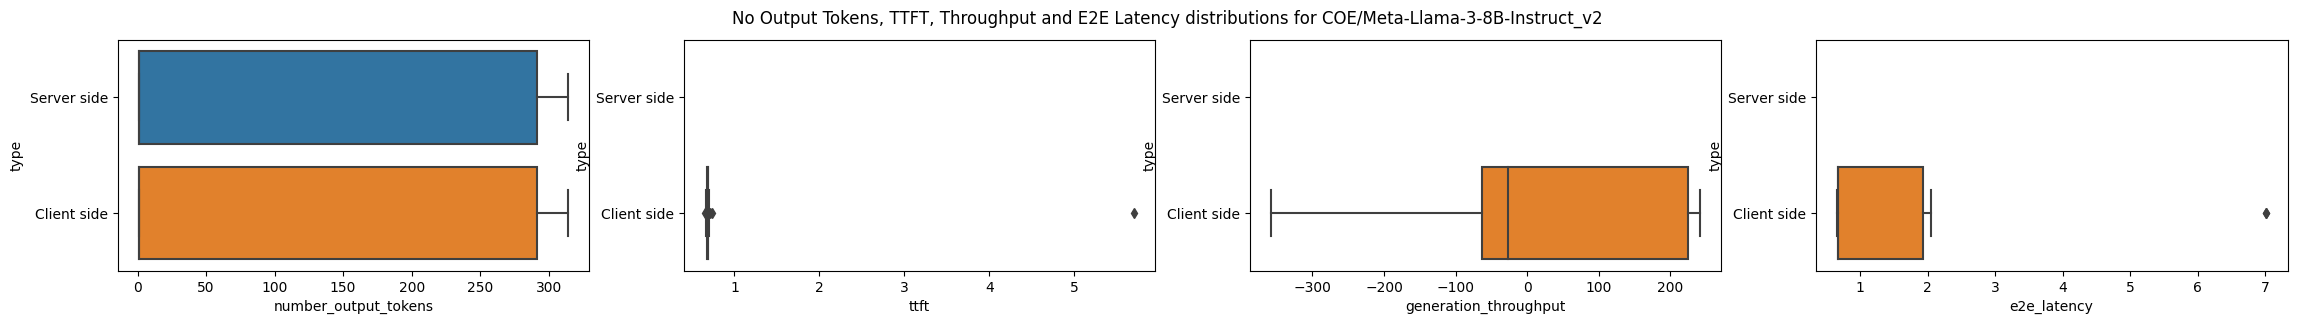

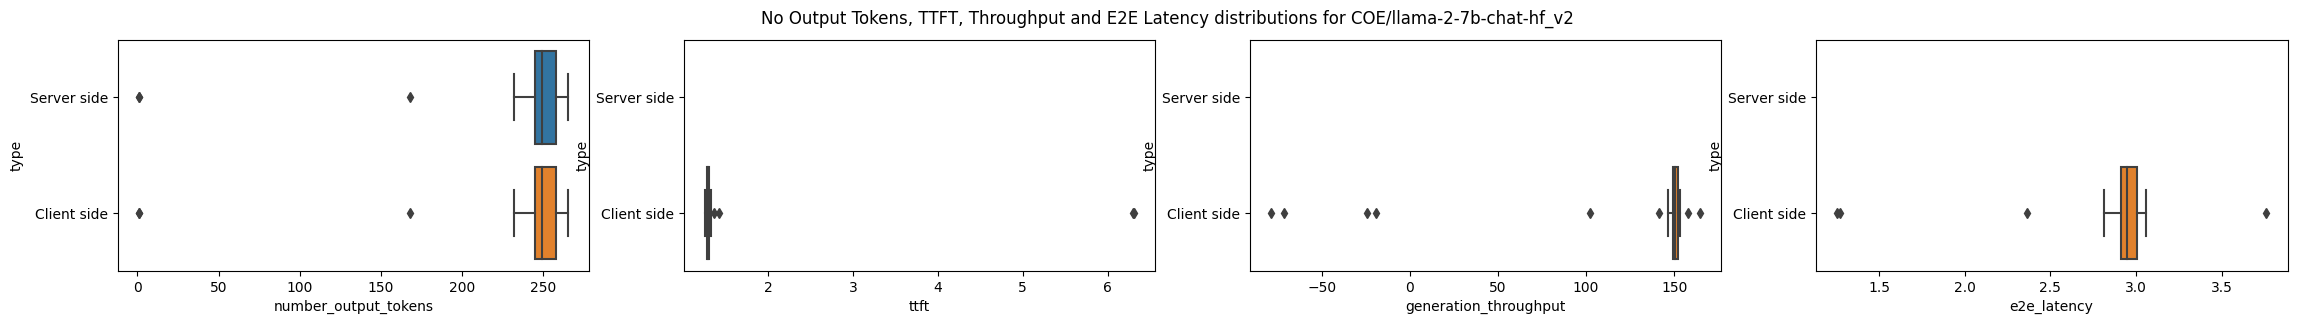

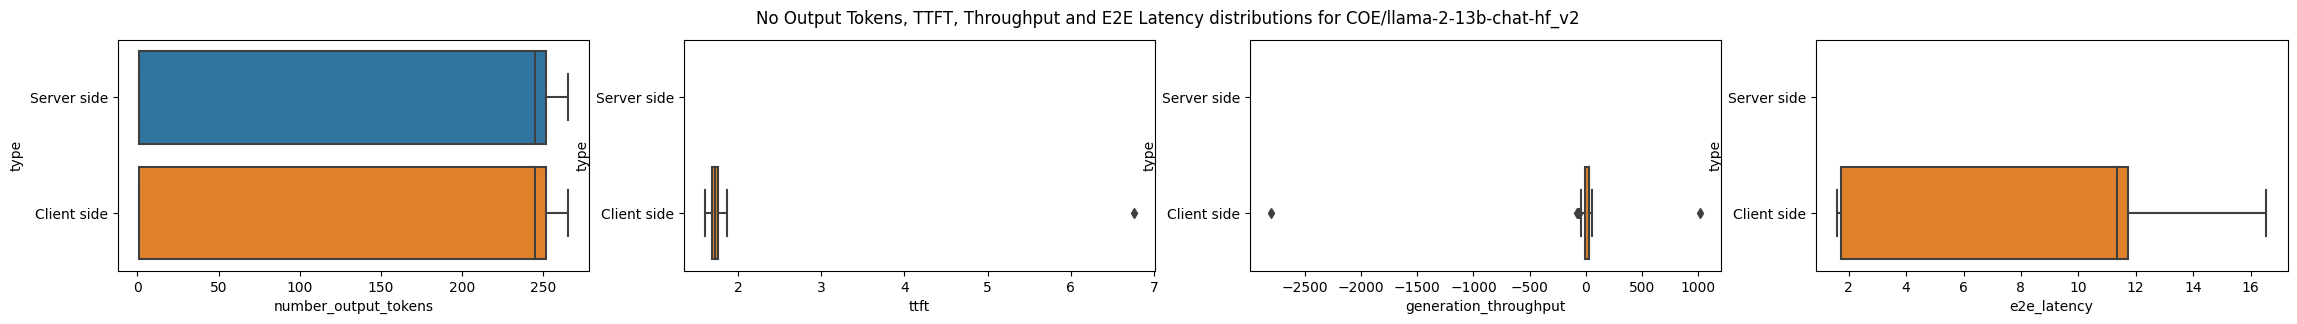

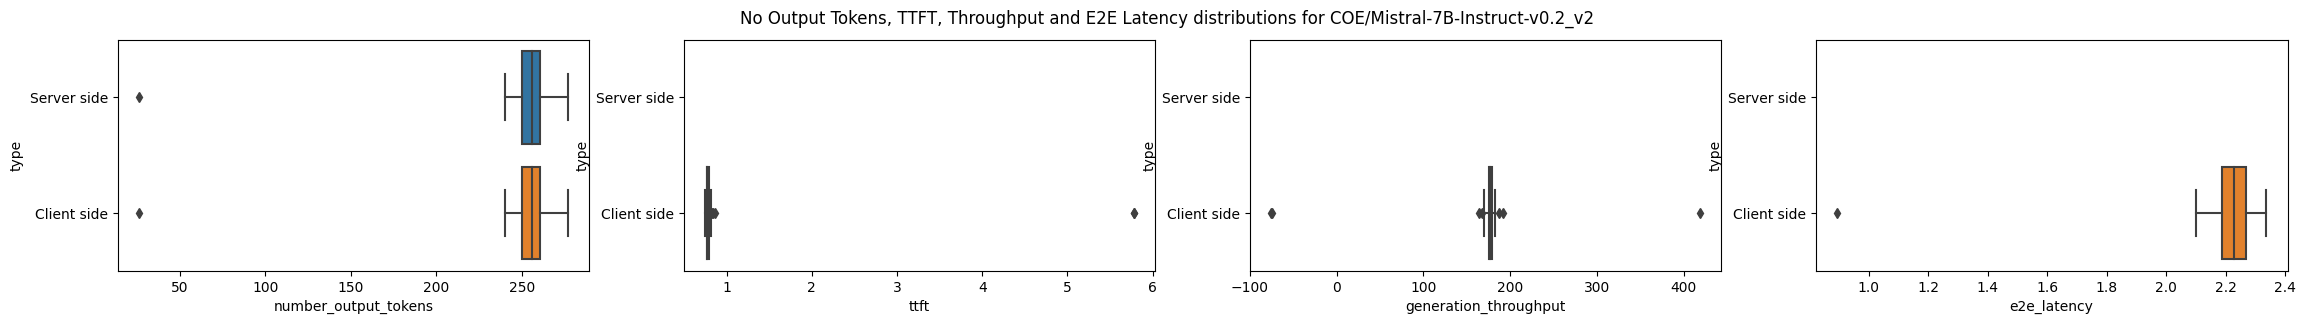

In [24]:
models = ['COE/Meta-Llama-3-8B-Instruct_v2','COE/llama-2-7b-chat-hf_v2','COE/llama-2-13b-chat-hf_v2','COE/Mistral-7B-Instruct-v0.2_v2']
show_distributions(models,  data_path='../data/results/llmperf/debug_COE/', input_tokens=1500, output_tokens=250)

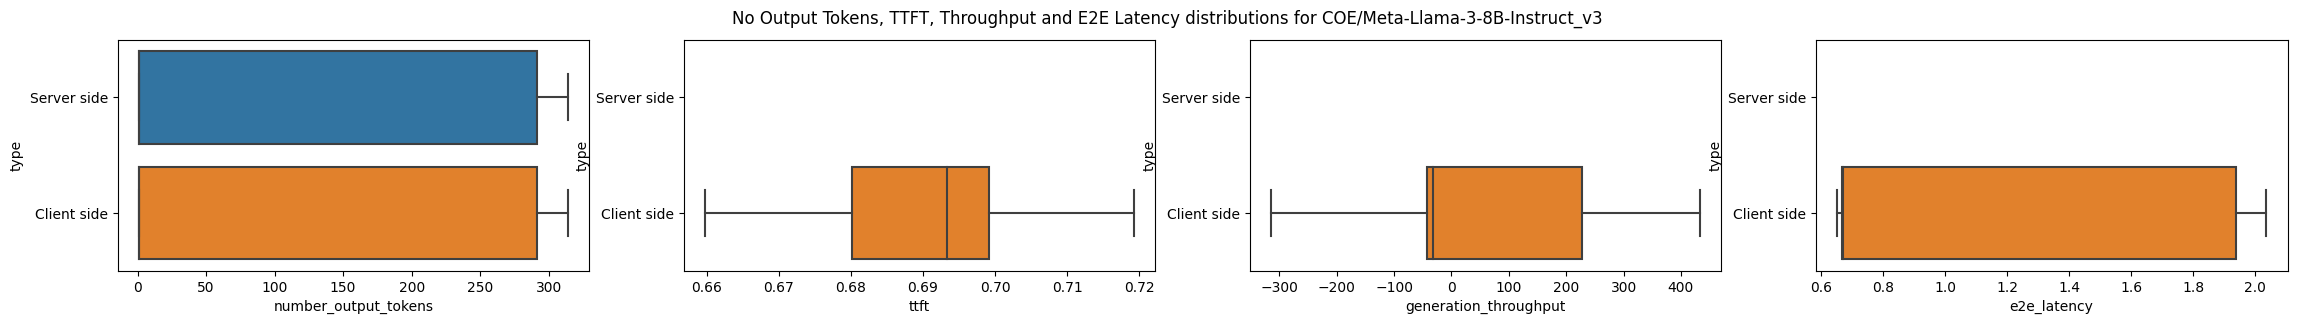

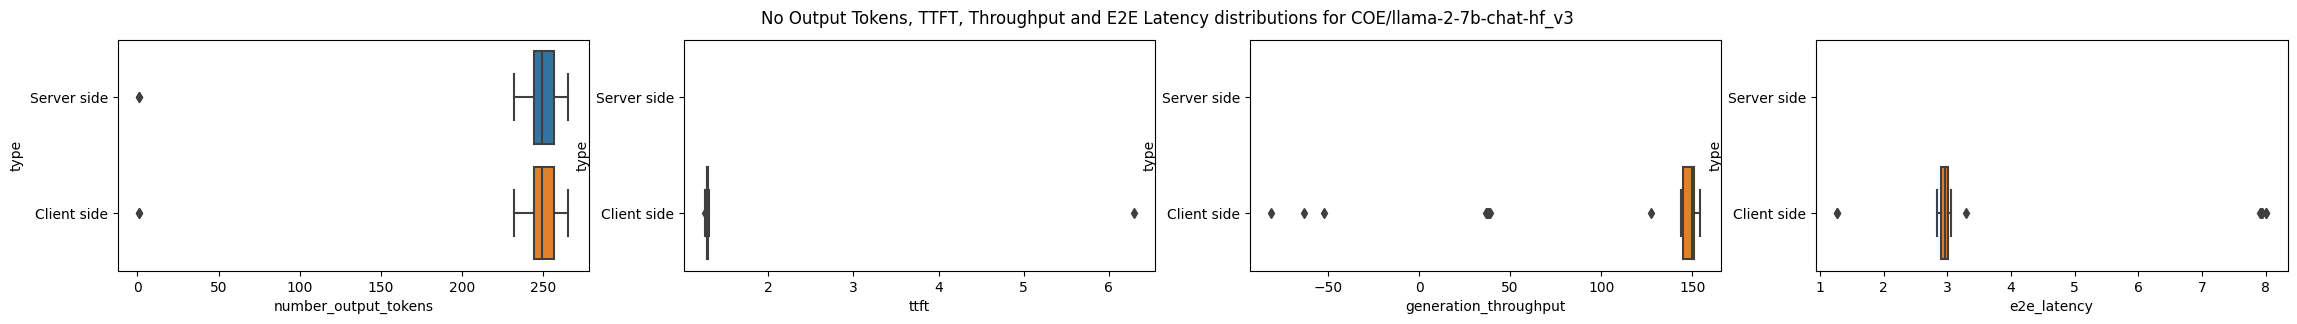

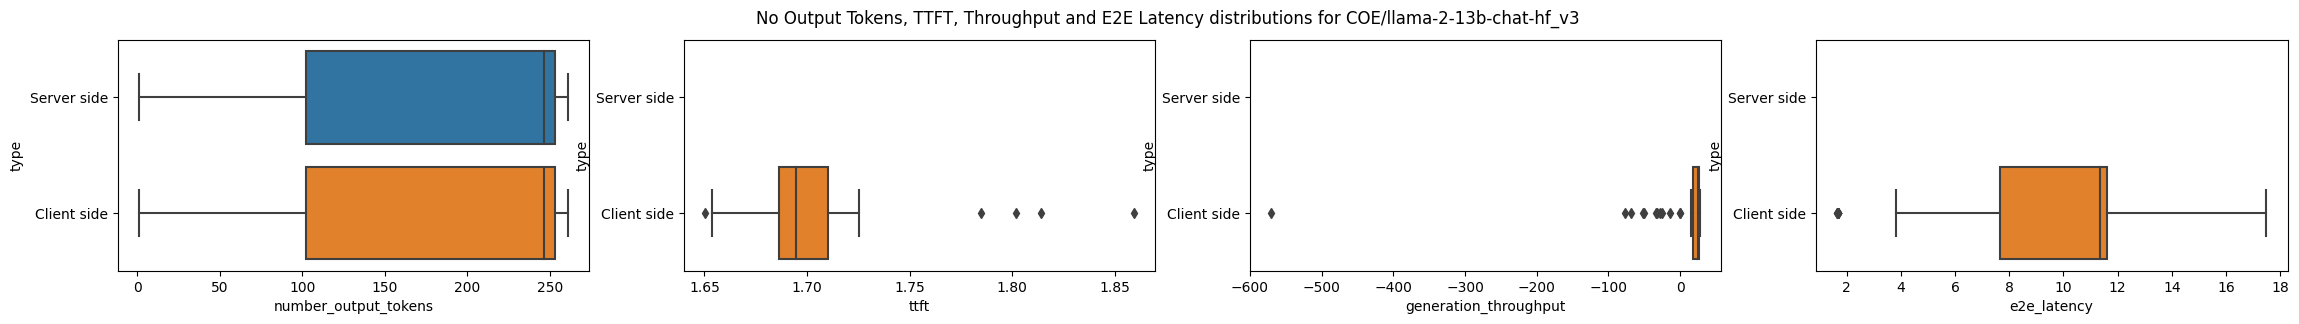

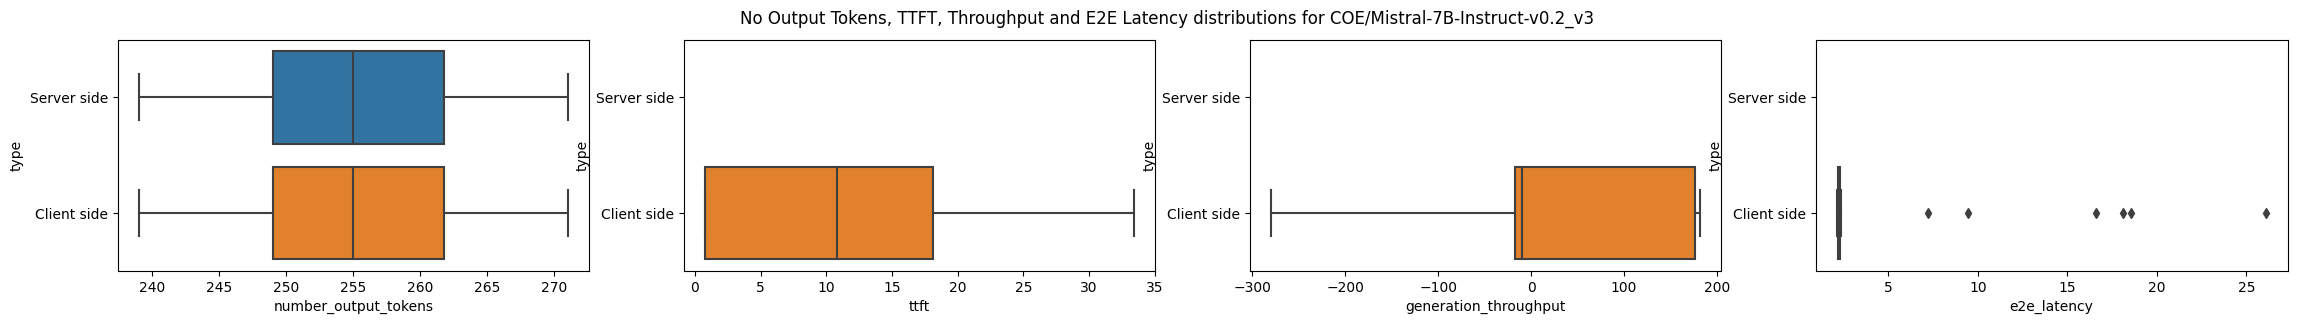

In [25]:
models = ['COE/Meta-Llama-3-8B-Instruct_v3','COE/llama-2-7b-chat-hf_v3','COE/llama-2-13b-chat-hf_v3','COE/Mistral-7B-Instruct-v0.2_v3']
show_distributions(models,  data_path='../data/results/llmperf/debug_COE/', input_tokens=1500, output_tokens=250)

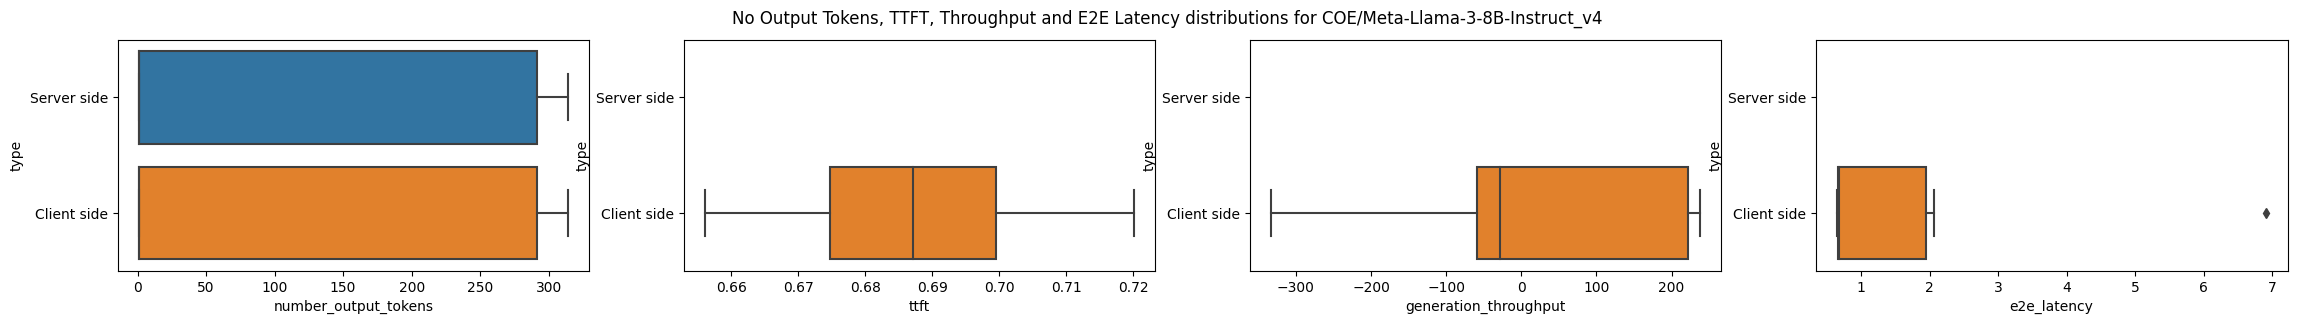

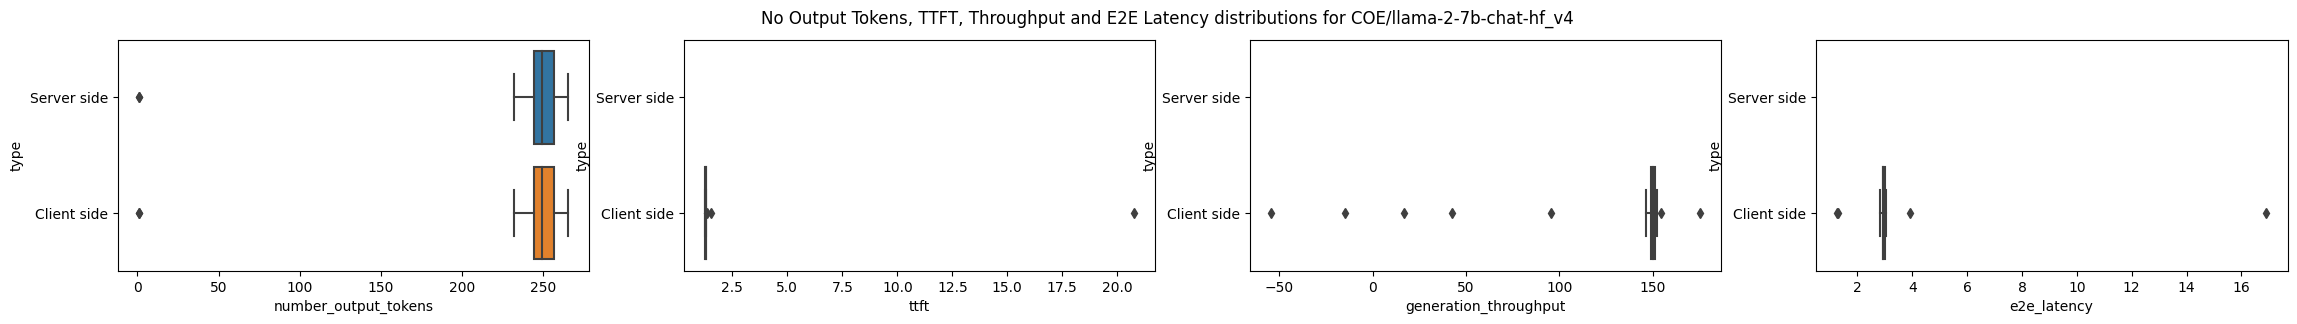

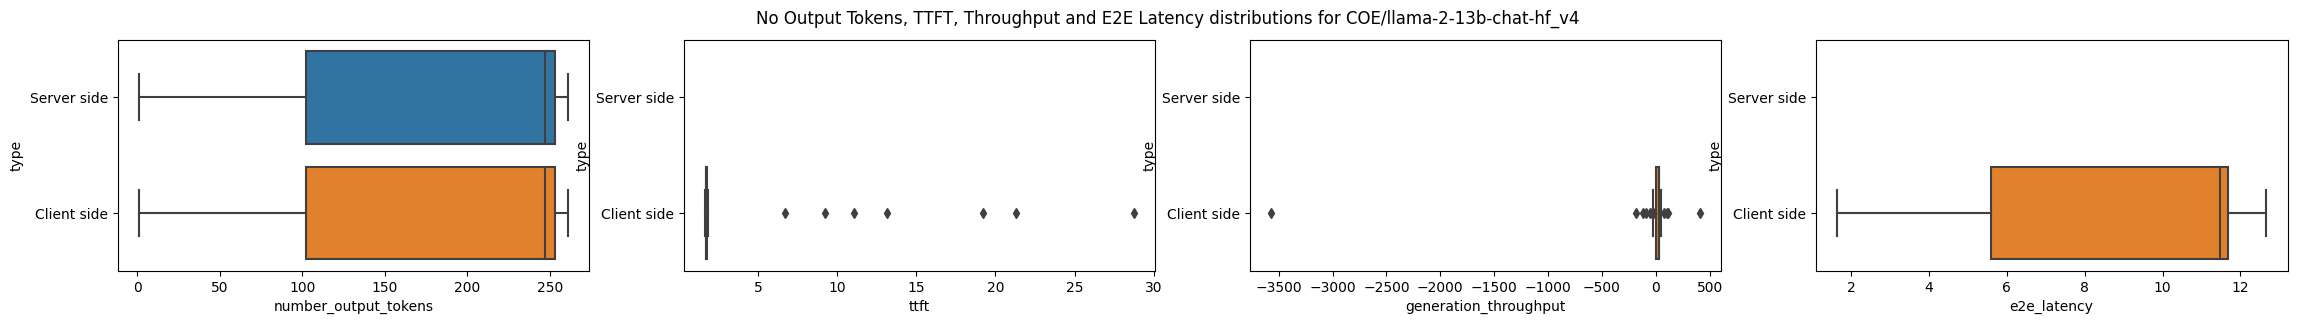

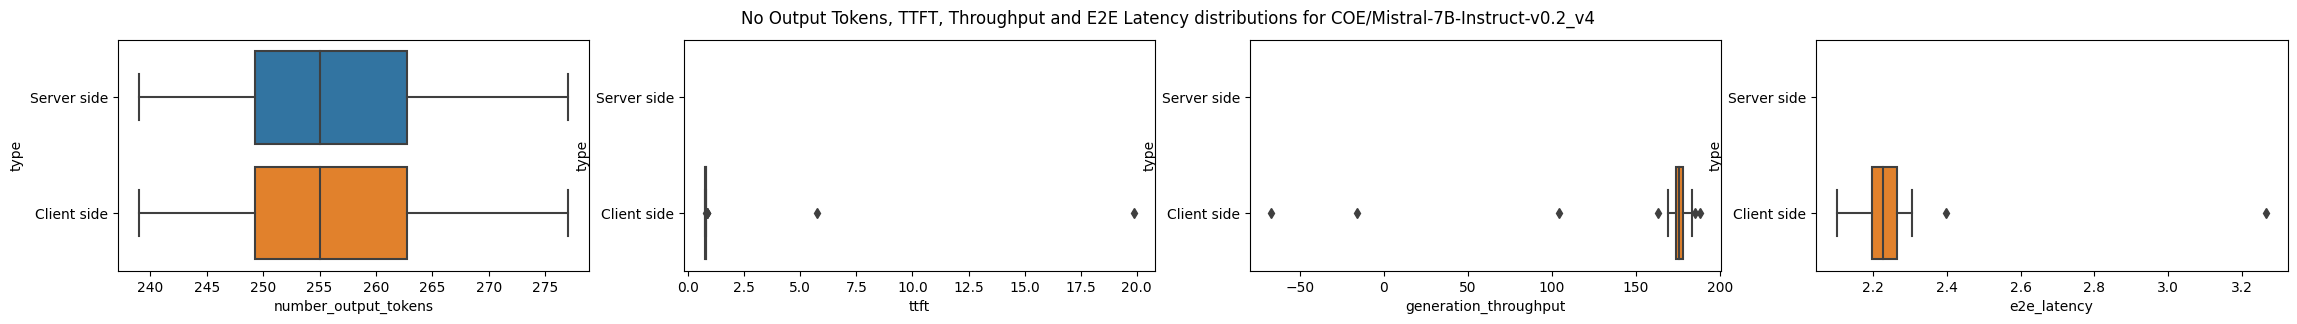

In [27]:
models = ['COE/Meta-Llama-3-8B-Instruct_v4','COE/llama-2-7b-chat-hf_v4','COE/llama-2-13b-chat-hf_v4','COE/Mistral-7B-Instruct-v0.2_v4']
show_distributions(models,  data_path='../data/results/llmperf/debug_COE/', input_tokens=1500, output_tokens=250)

# Using Turbo

## by run

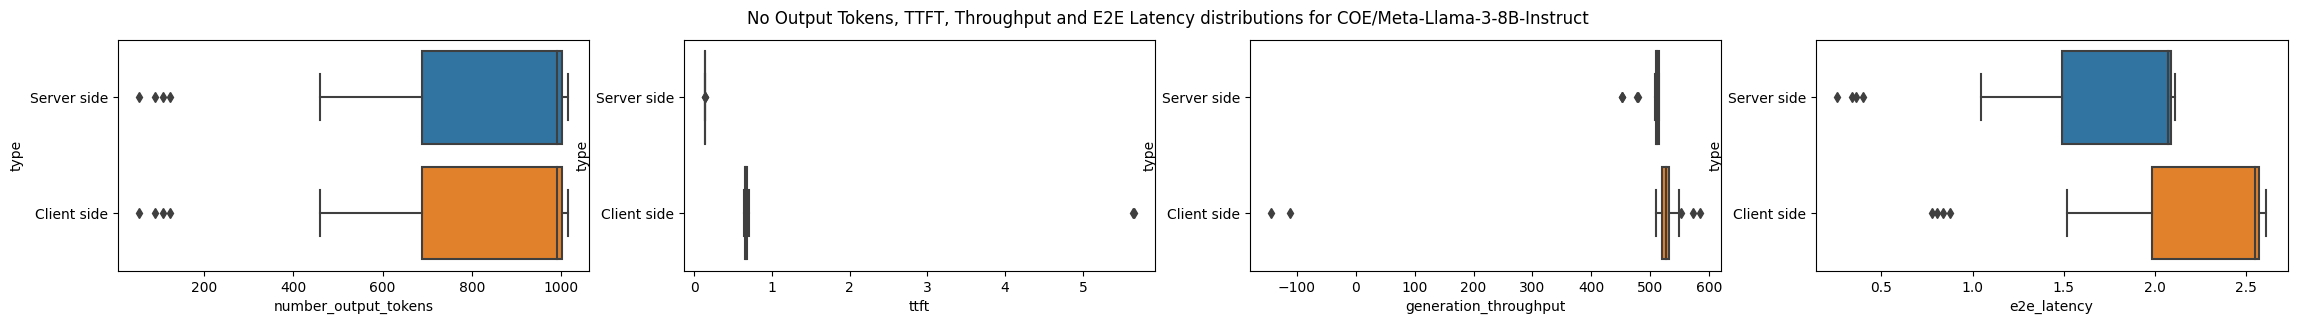

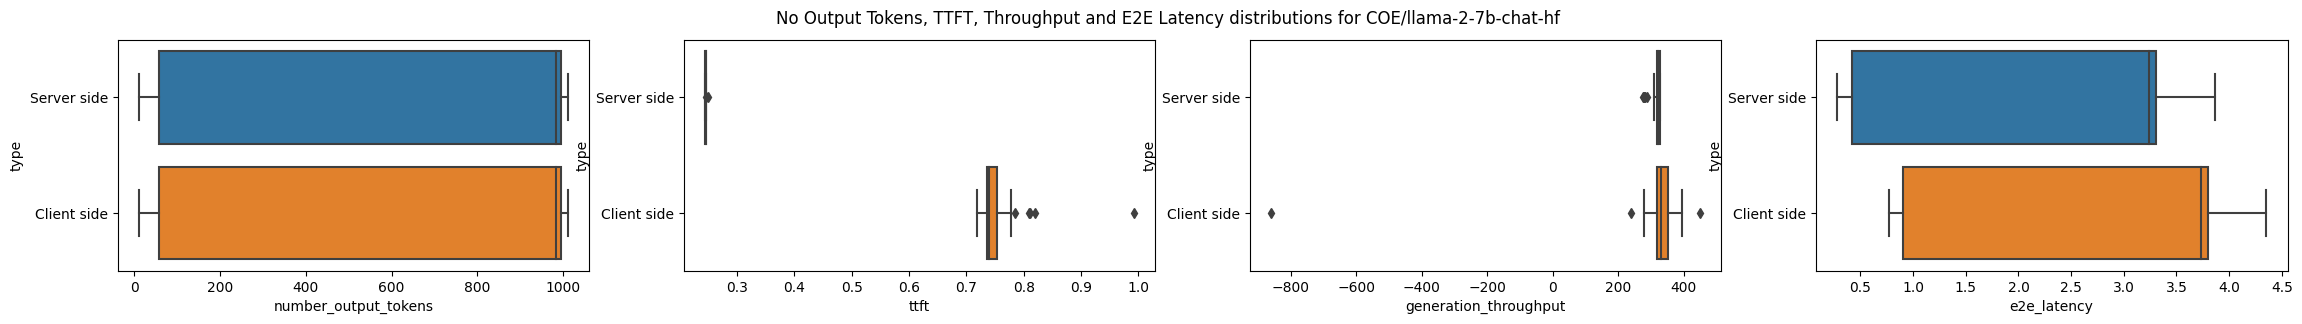

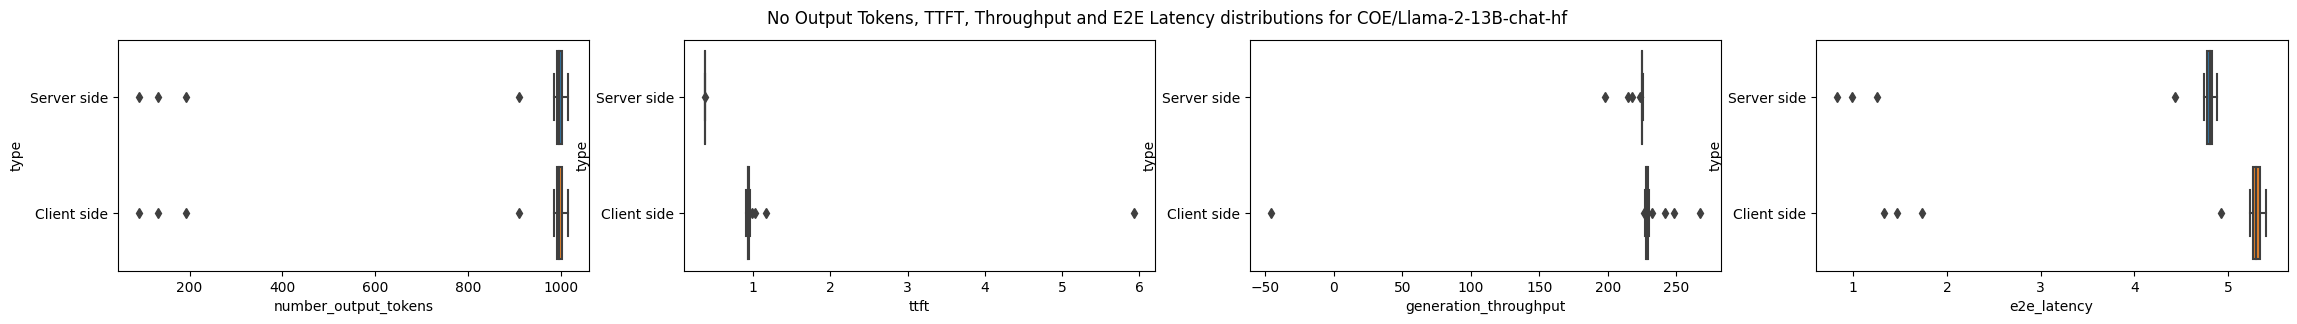

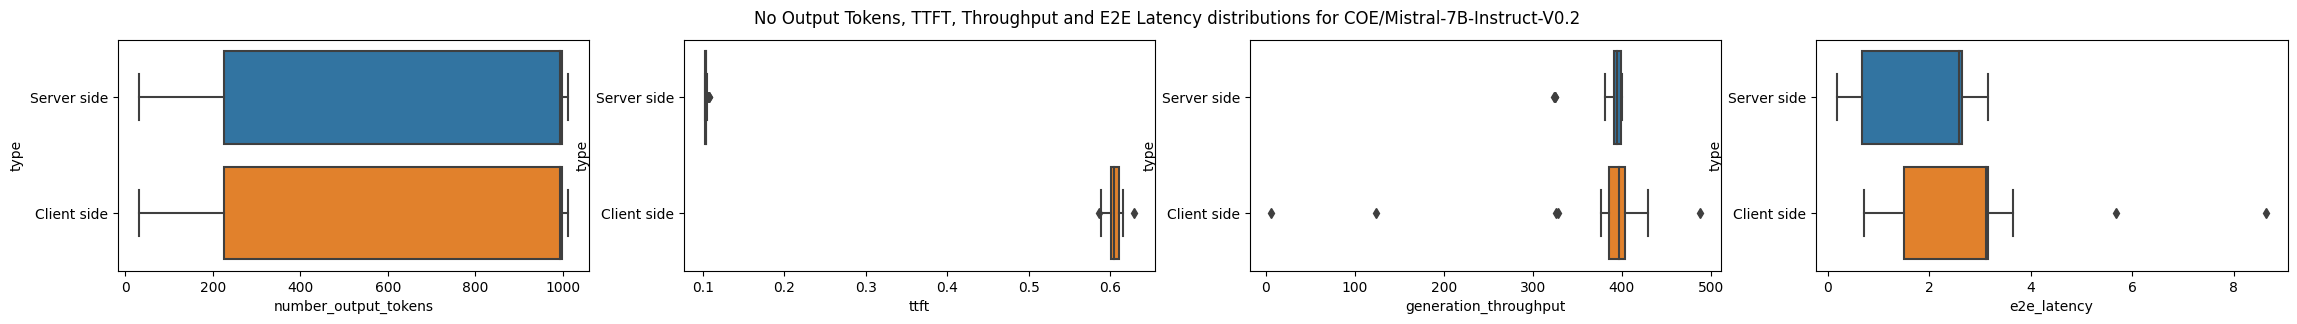

In [33]:
models = ['COE/Meta-Llama-3-8B-Instruct','COE/llama-2-7b-chat-hf','COE/Llama-2-13B-chat-hf','COE/Mistral-7B-Instruct-V0.2']
show_distributions(models,  data_path='../data/results/llmperf/debug_turbo/', input_tokens=1000, output_tokens=1000)

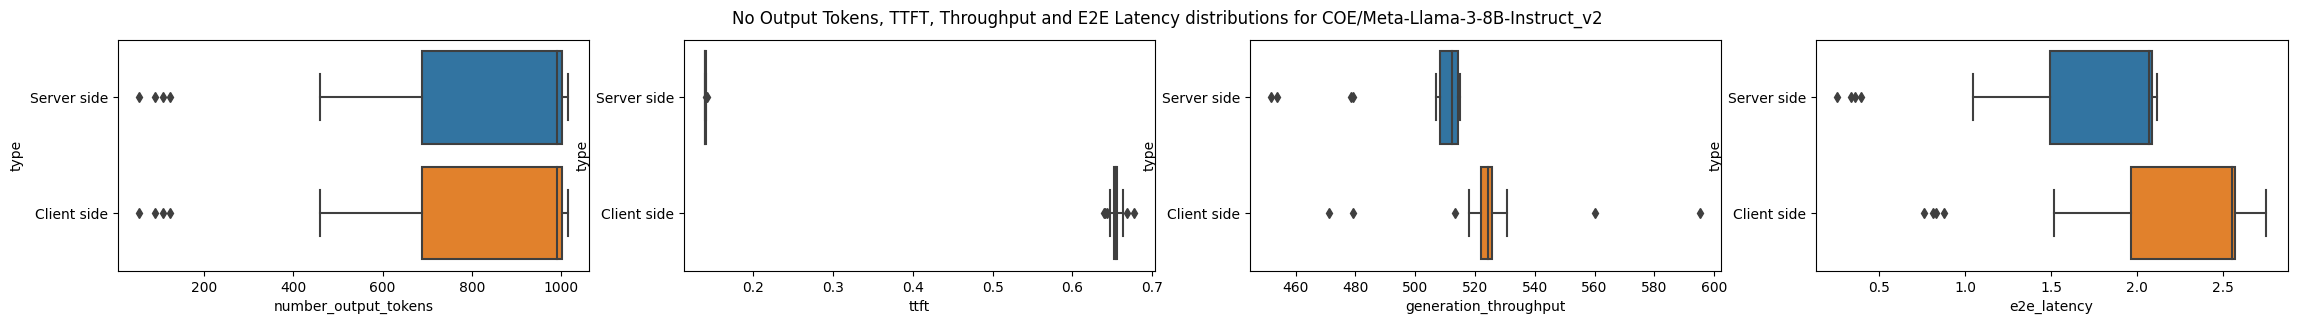

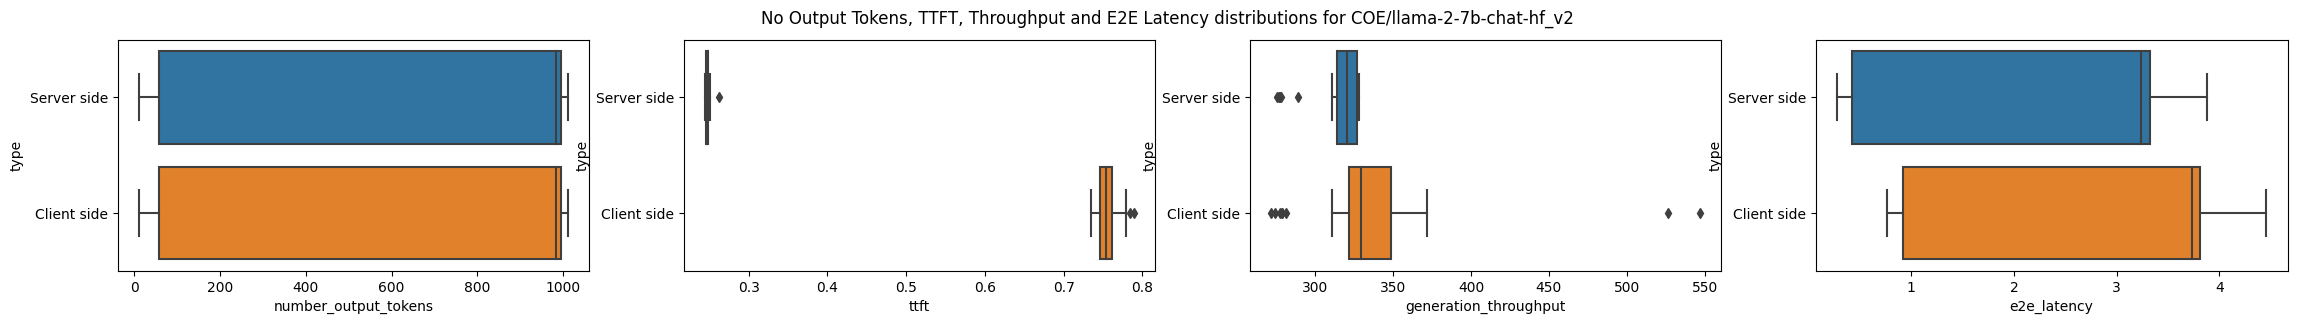

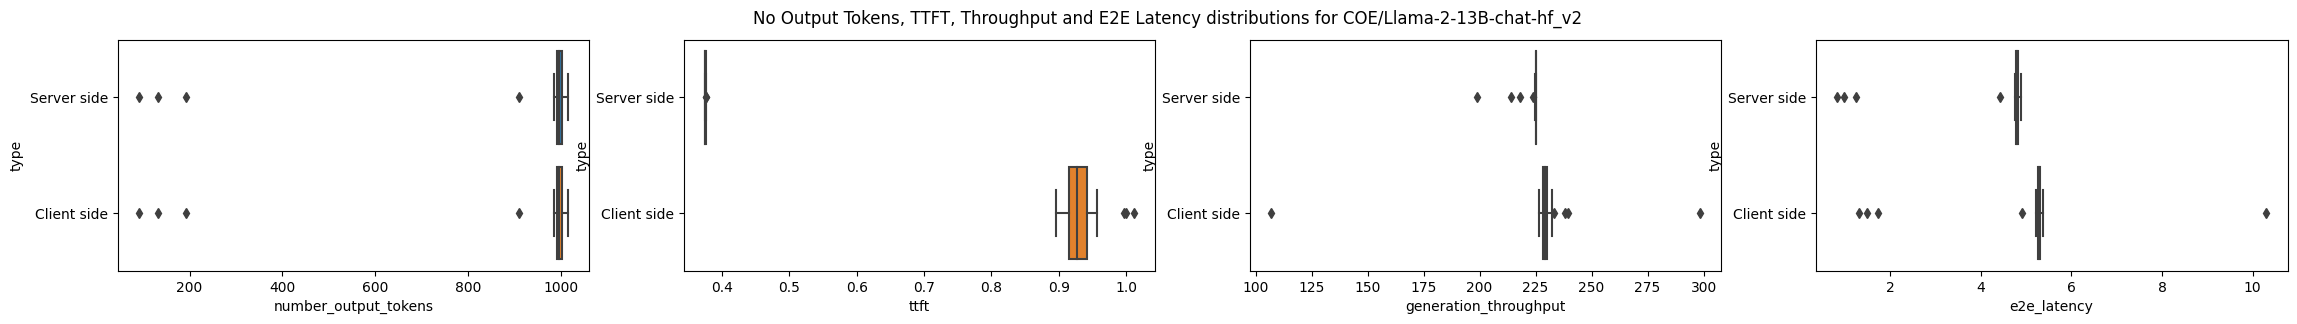

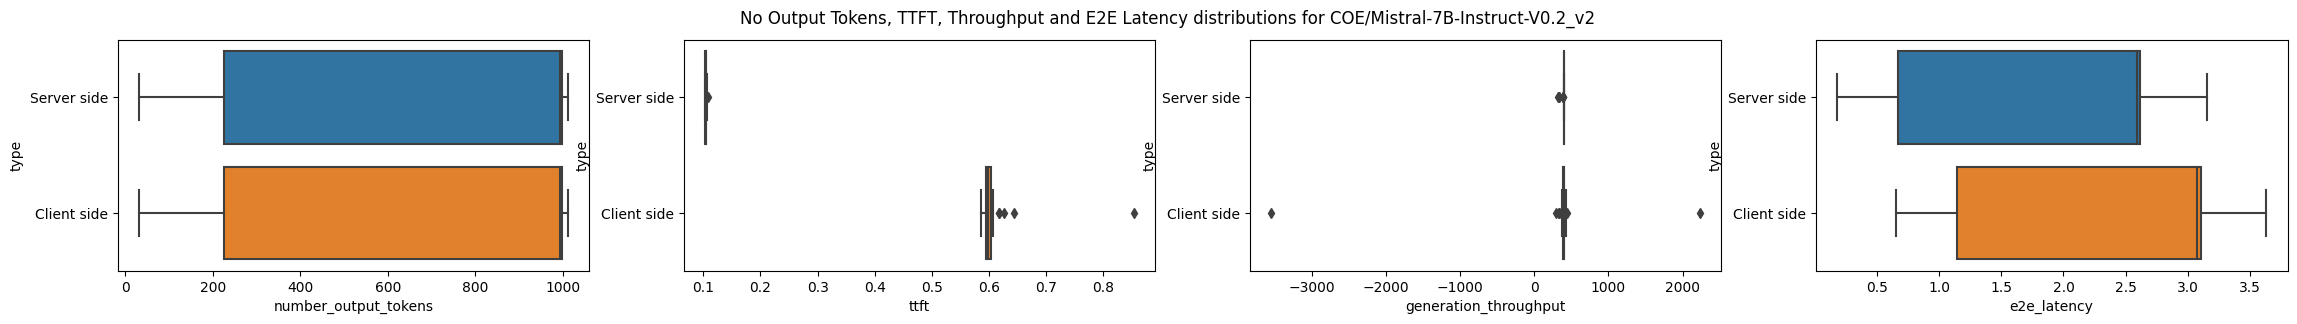

In [34]:
models = ['COE/Meta-Llama-3-8B-Instruct_v2','COE/llama-2-7b-chat-hf_v2','COE/Llama-2-13B-chat-hf_v2','COE/Mistral-7B-Instruct-V0.2_v2']
show_distributions(models,  data_path='../data/results/llmperf/debug_turbo/', input_tokens=1000, output_tokens=1000)

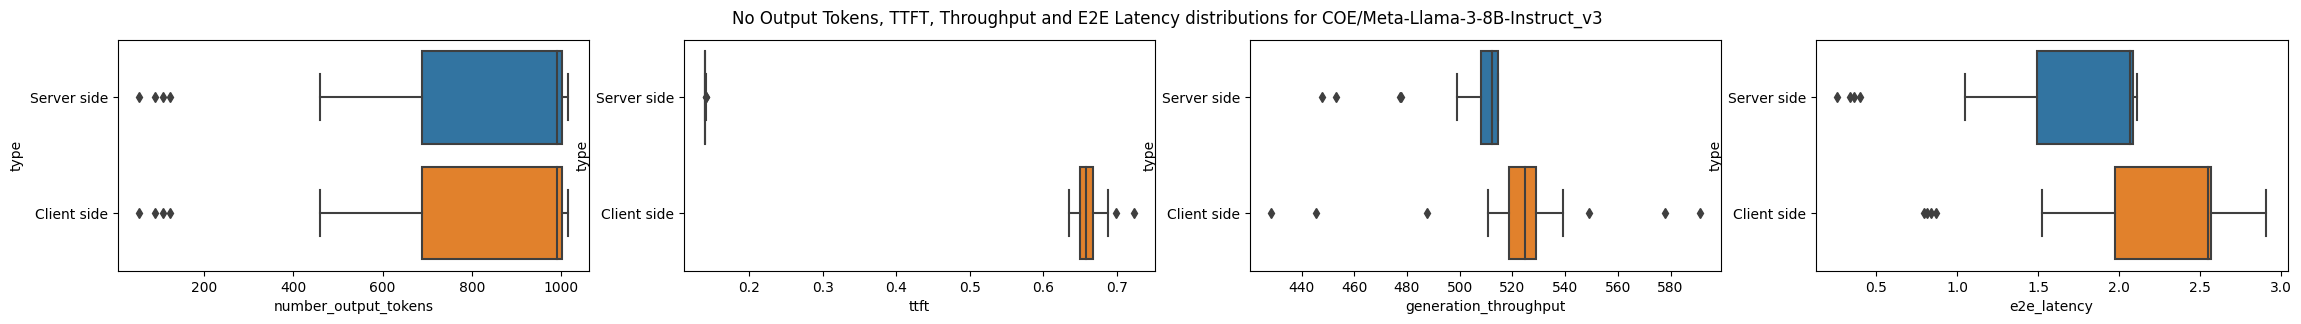

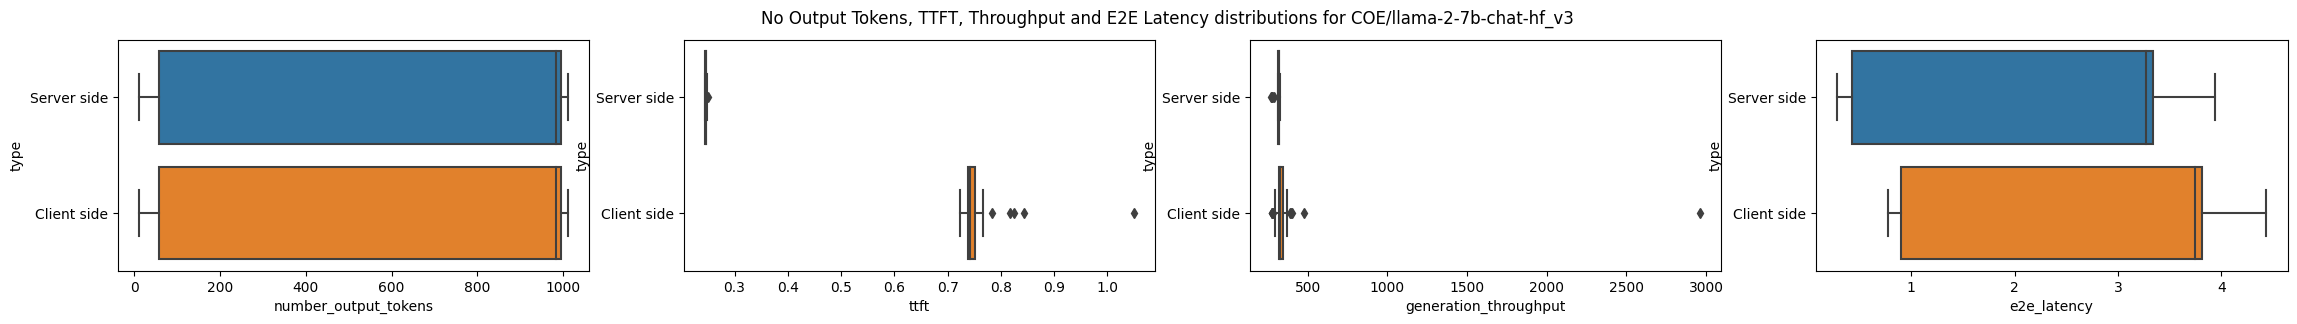

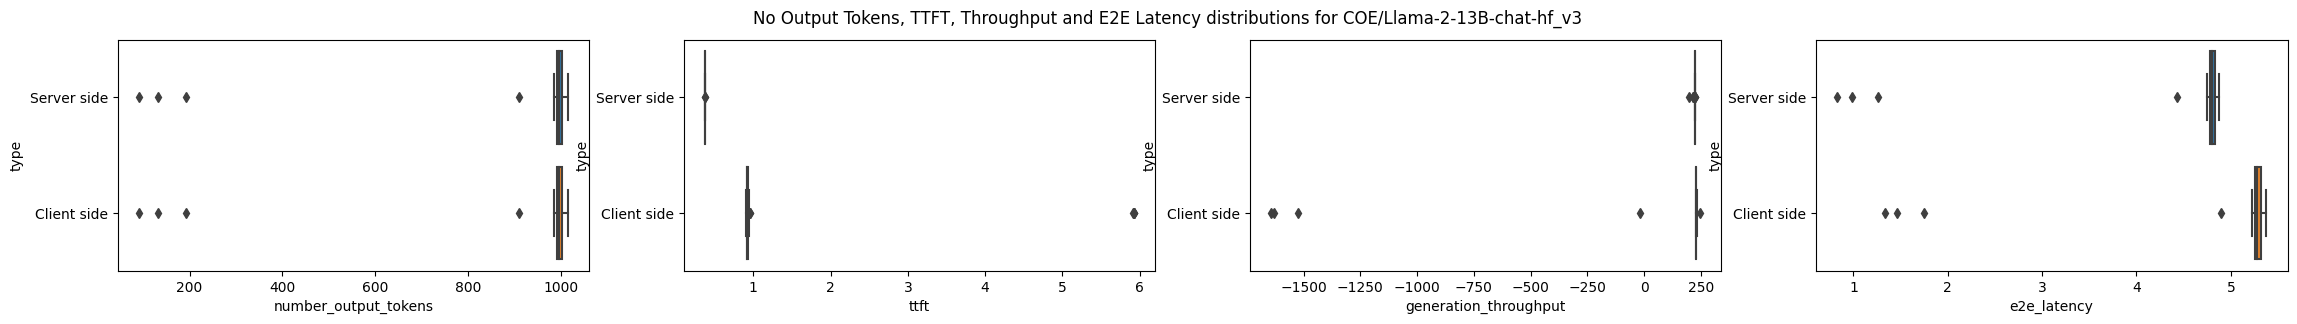

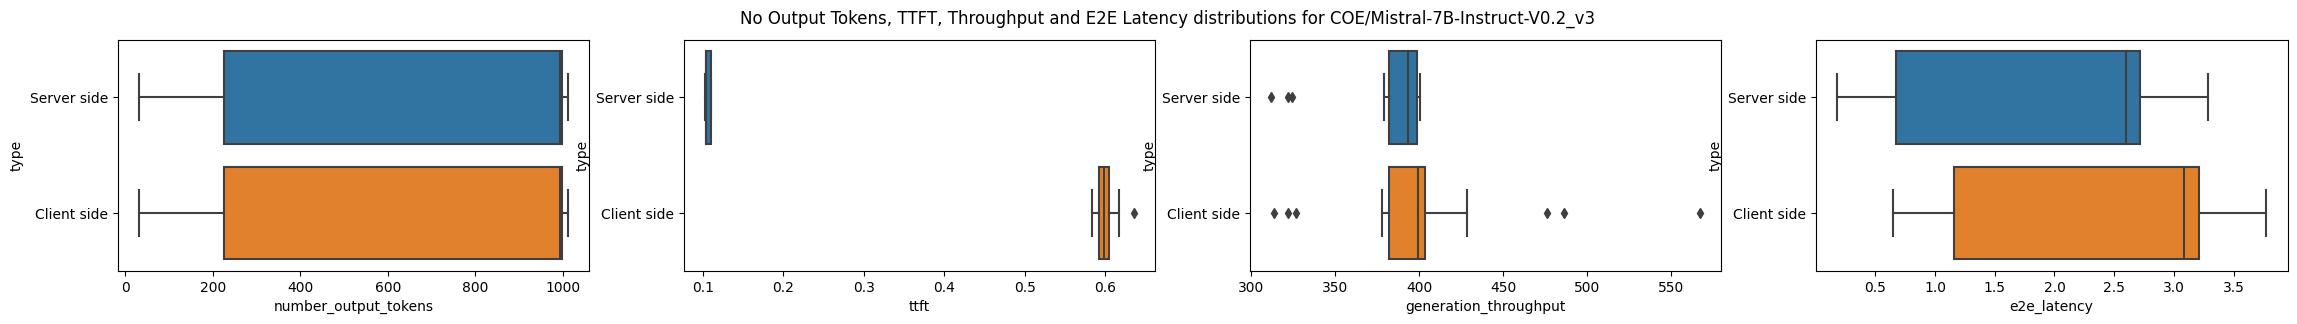

In [35]:
models = ['COE/Meta-Llama-3-8B-Instruct_v3','COE/llama-2-7b-chat-hf_v3','COE/Llama-2-13B-chat-hf_v3','COE/Mistral-7B-Instruct-V0.2_v3']
show_distributions(models,  data_path='../data/results/llmperf/debug_turbo/', input_tokens=1000, output_tokens=1000)

## by model

In [125]:
def show_distributions(models, data_path, input_tokens=1000, output_tokens=1000):
    
    fig = plt.figure(layout='constrained', figsize=(40, 25))    
    subfigs = fig.subfigures(nrows=len(models))
    
    for idx, model in enumerate(models):
        df_user = pd.read_json(f"{data_path}{model.replace('/','-').replace('.','-')}_{input_tokens}_{output_tokens}_1_stream_individual_responses.json")
        df_user['concurrent_user'] = 1
        final_df = get_final_metrics_df(df_user)
        
        df_server = final_df[['ttft_server_s','number_input_tokens', 'number_total_tokens', 'generation_throughput_server','number_output_tokens', 'end_to_end_latency_server_s']].copy()
        df_server = df_server.rename(columns = {'ttft_server_s': 'ttft', 'generation_throughput_server': 'generation_throughput', 'end_to_end_latency_server_s': 'e2e_latency'})
        df_server['type'] = 'Server side'               

        df_client = final_df[['ttft_s','number_input_tokens', 'number_total_tokens', 'generation_throughput','number_output_tokens', 'end_to_end_latency_s']].copy()
        df_client = df_client.rename(columns = {'ttft_s': 'ttft', 'end_to_end_latency_s': 'e2e_latency'})
        df_client['type'] = 'Client side'               

        df_ttft_throughput_latency = pd.concat([df_server, df_client], ignore_index=True)
        
        ax = subfigs[idx].subplots(1, 4)
        subfigs[idx].suptitle(f'{model}', fontsize='x-large')

        sns.boxplot(data=df_ttft_throughput_latency, x="number_output_tokens", y="type", ax=ax[0])
        sns.boxplot(data=df_ttft_throughput_latency, x="ttft", y="type", ax=ax[1])
        sns.boxplot(data=df_ttft_throughput_latency, x="generation_throughput", y="type", ax=ax[2])
        sns.boxplot(data=df_ttft_throughput_latency, x="e2e_latency", y="type", ax=ax[3])
        
    fig.suptitle(f"No Output Tokens, TTFT, Throughput, E2E Latency distributions", fontsize='xx-large')
    plt.show()

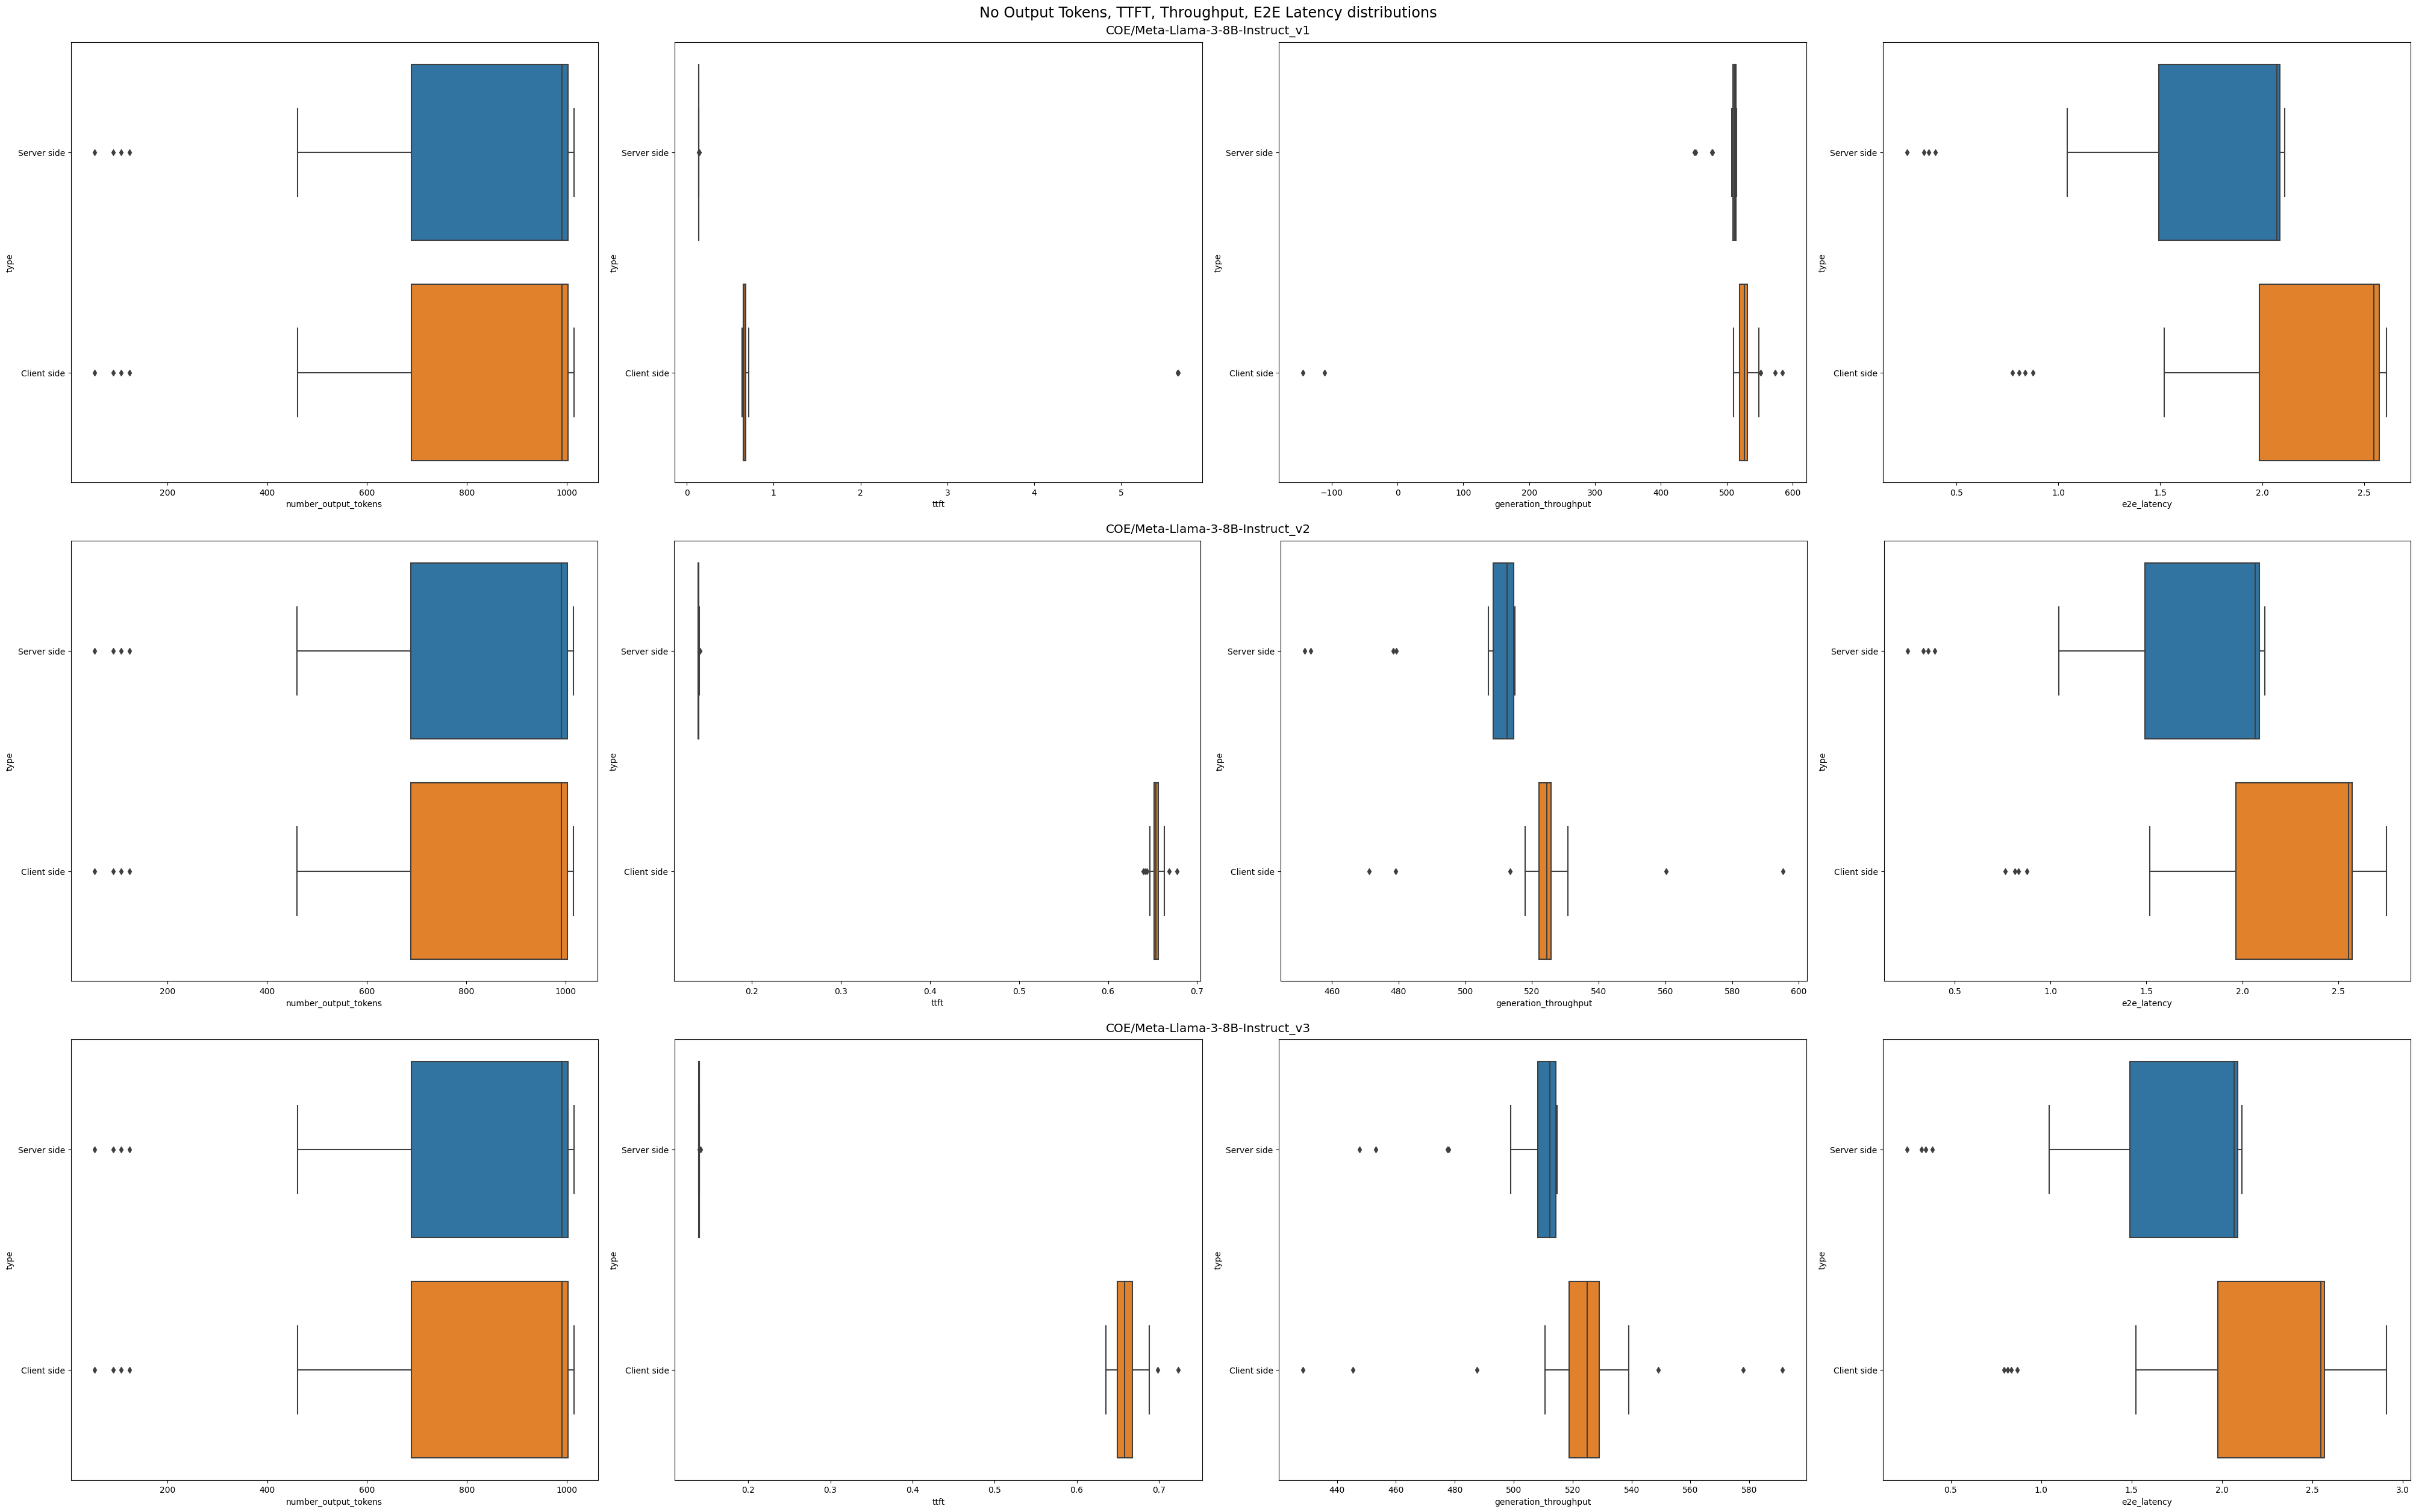

In [126]:
models = ['COE/Meta-Llama-3-8B-Instruct_v1','COE/Meta-Llama-3-8B-Instruct_v2','COE/Meta-Llama-3-8B-Instruct_v3']
show_distributions(models,  data_path='../data/results/llmperf/debug_turbo/', input_tokens=1000, output_tokens=1000)

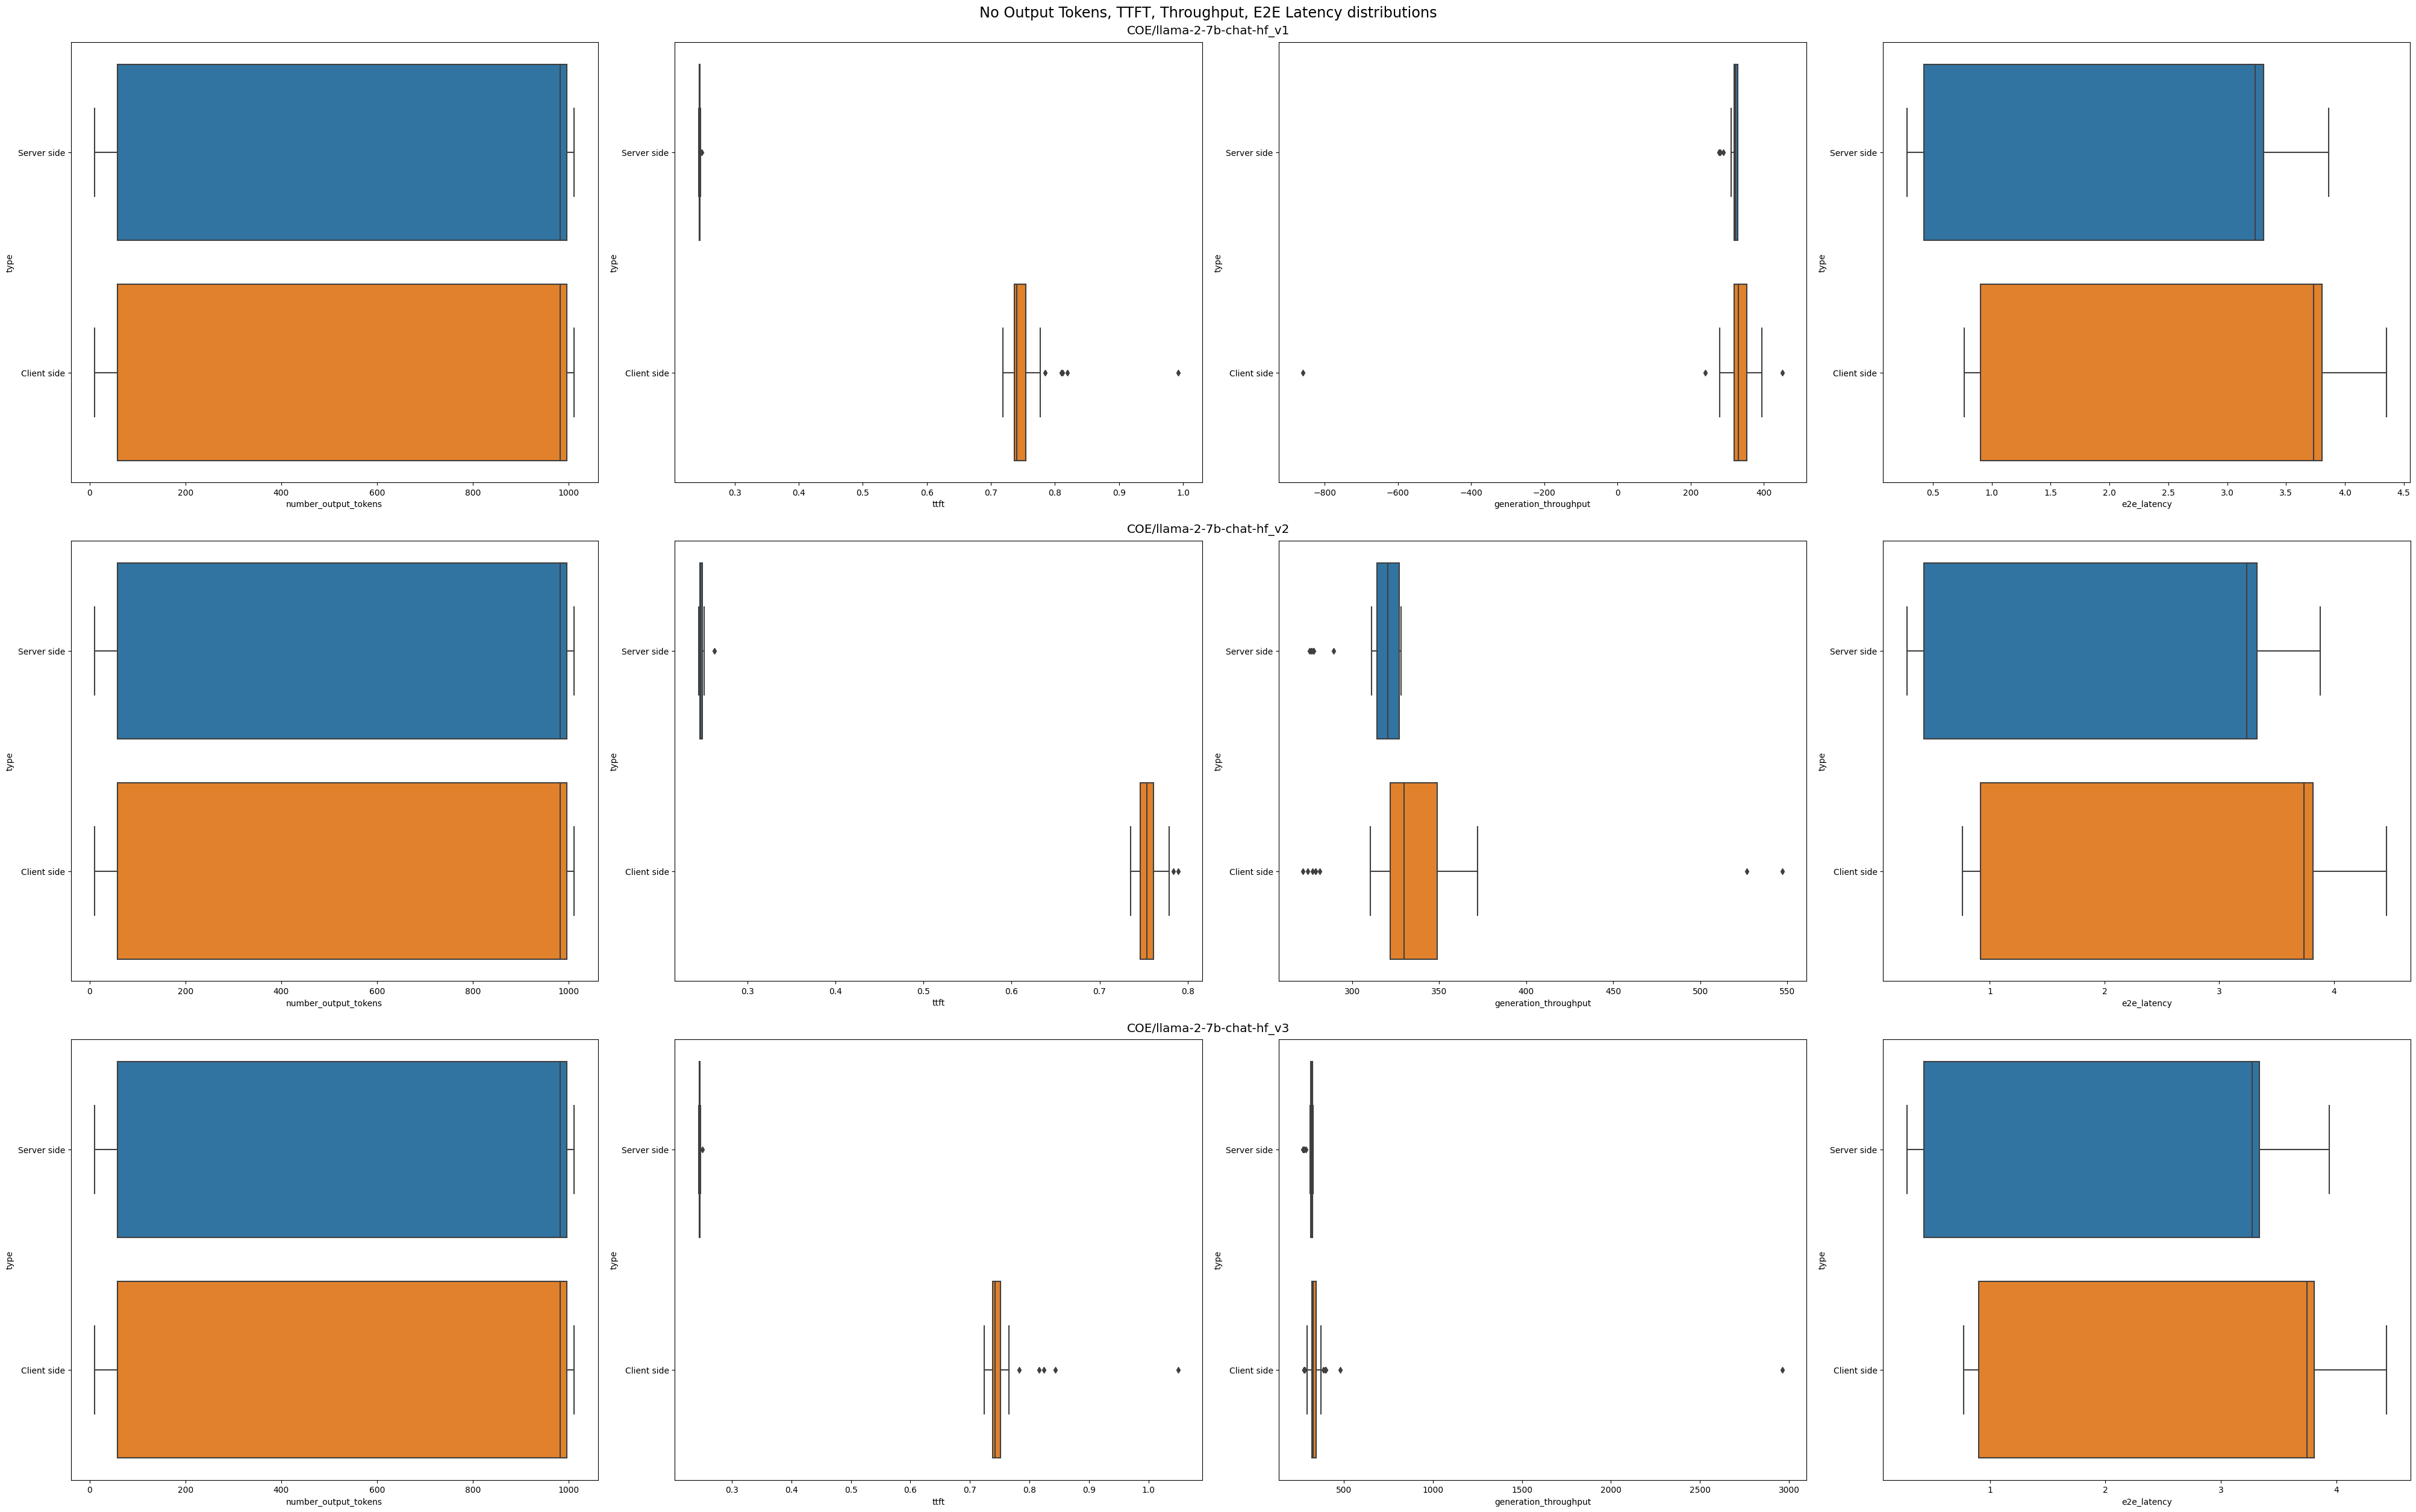

In [127]:
models = ['COE/llama-2-7b-chat-hf_v1','COE/llama-2-7b-chat-hf_v2','COE/llama-2-7b-chat-hf_v3']
show_distributions(models,  data_path='../data/results/llmperf/debug_turbo/', input_tokens=1000, output_tokens=1000)

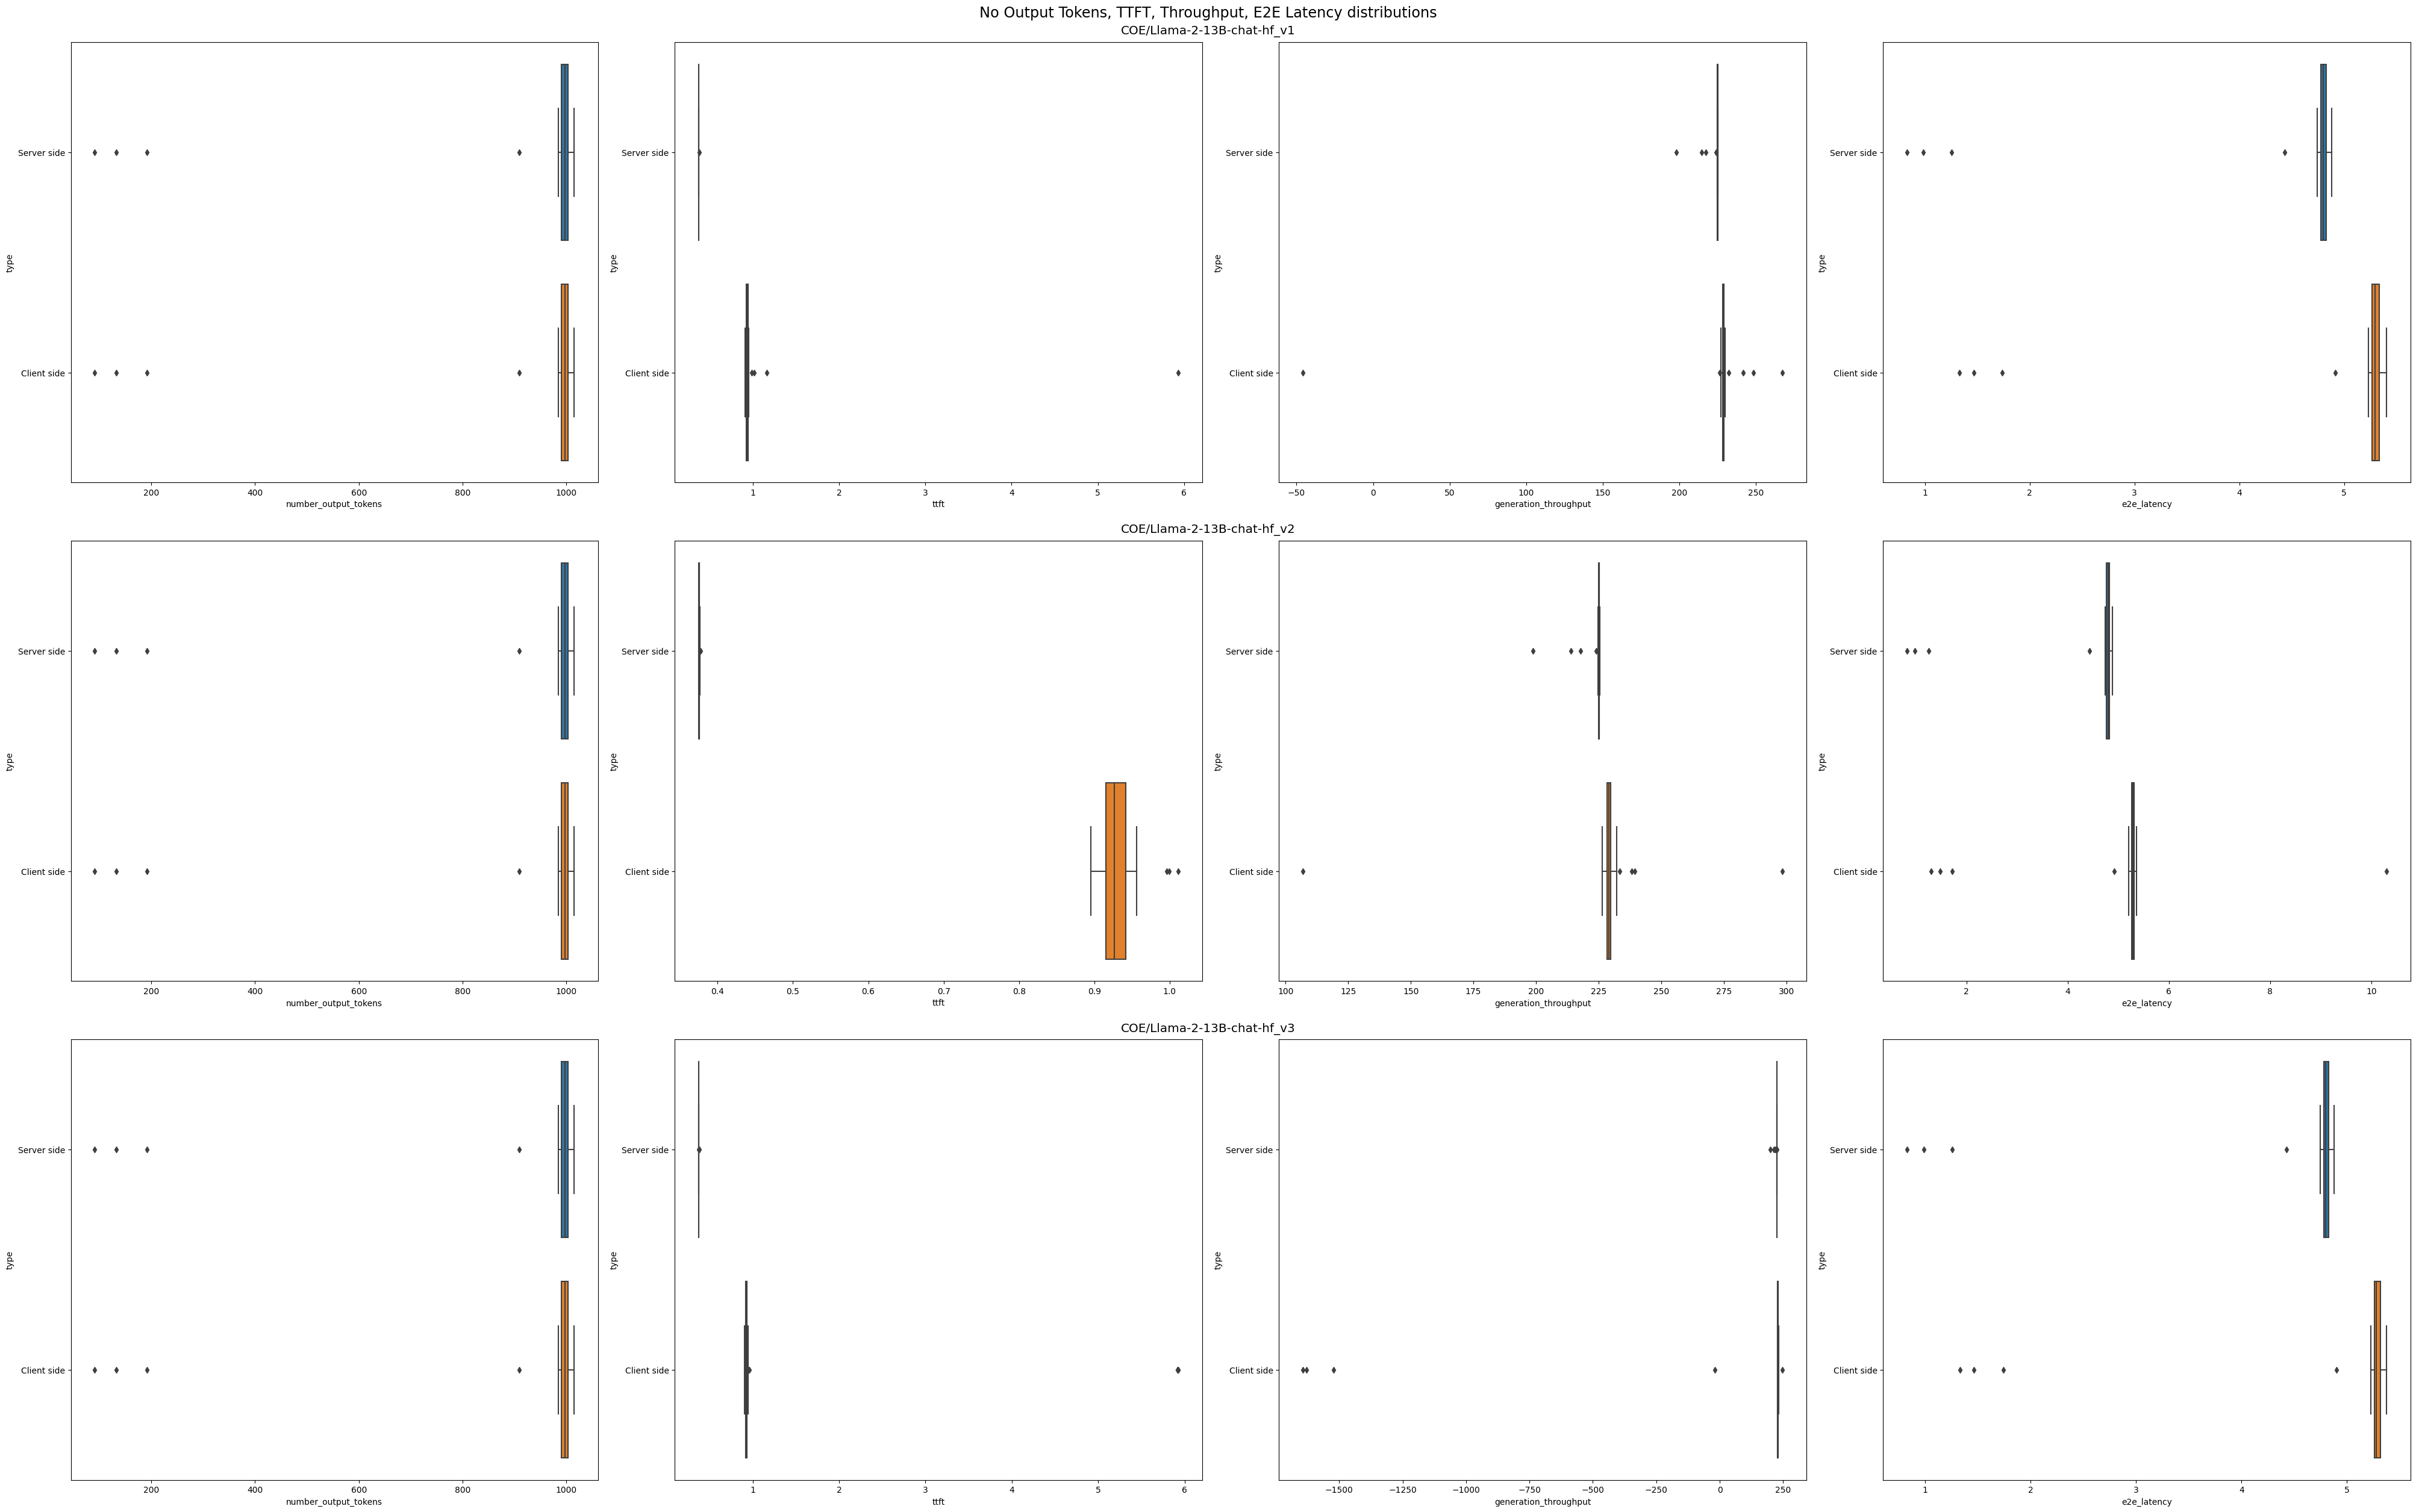

In [128]:
models = ['COE/Llama-2-13B-chat-hf_v1','COE/Llama-2-13B-chat-hf_v2','COE/Llama-2-13B-chat-hf_v3']
show_distributions(models,  data_path='../data/results/llmperf/debug_turbo/', input_tokens=1000, output_tokens=1000)

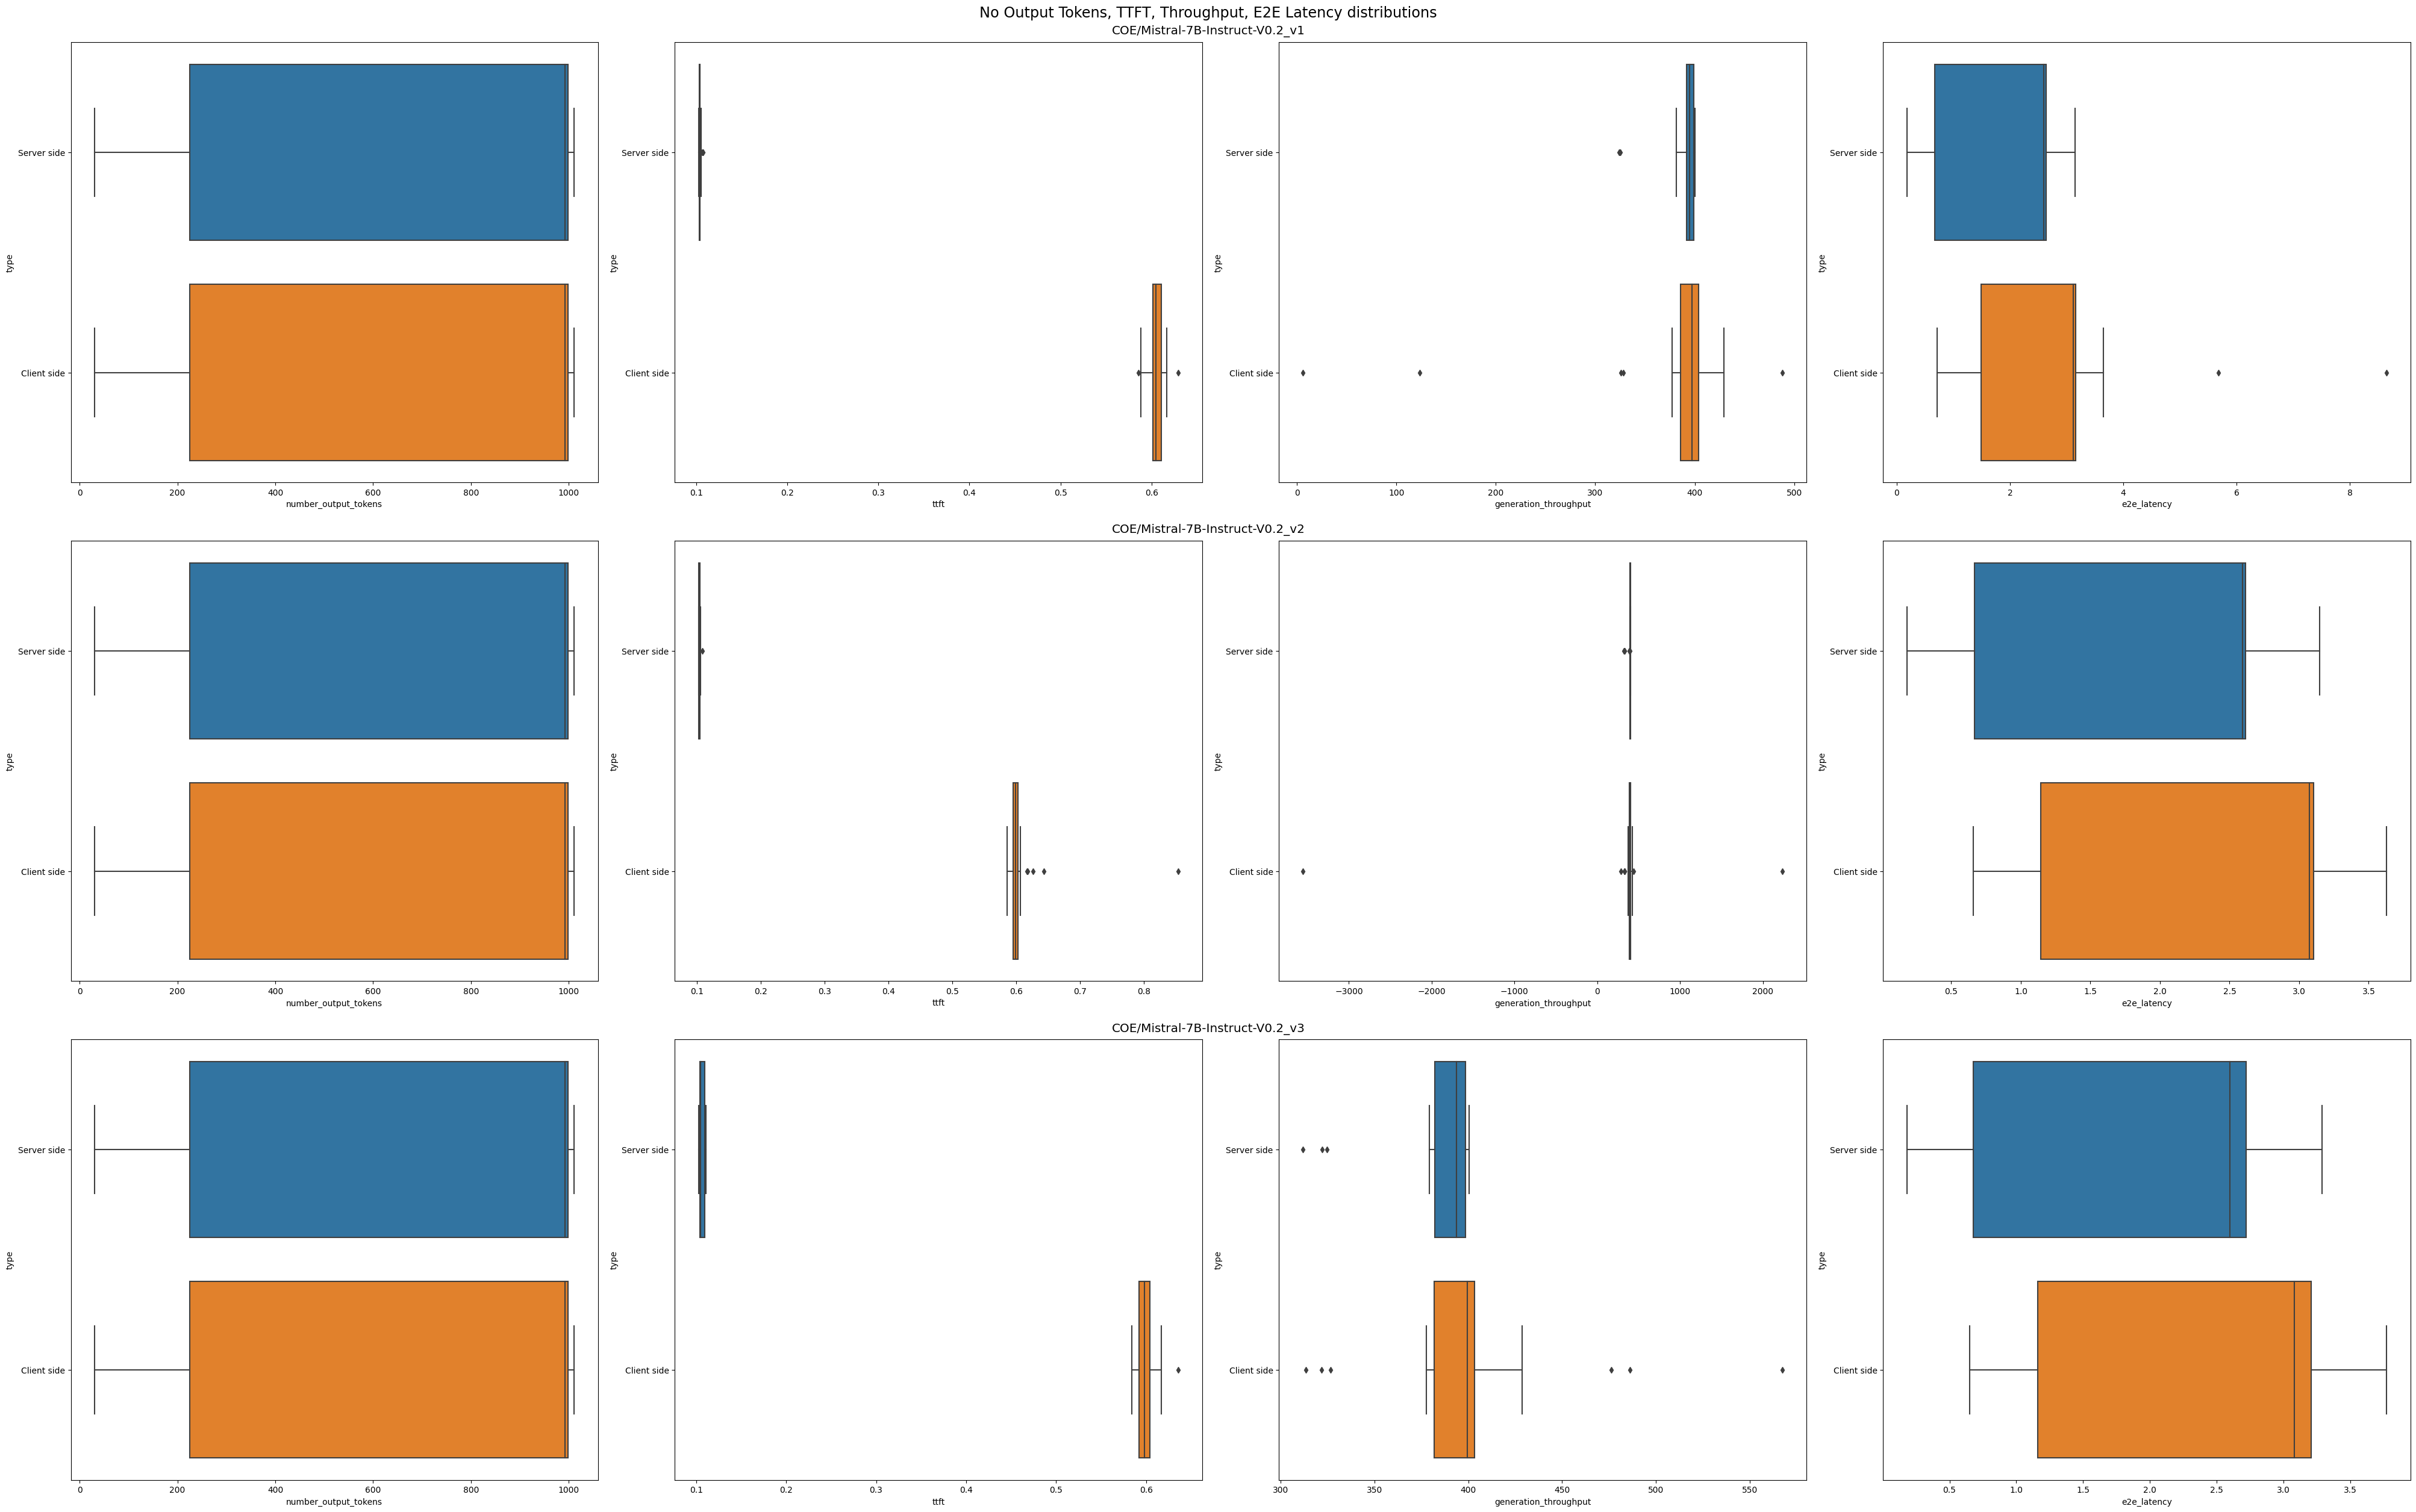

In [129]:
models = ['COE/Mistral-7B-Instruct-V0.2_v1','COE/Mistral-7B-Instruct-V0.2_v2','COE/Mistral-7B-Instruct-V0.2_v3']
show_distributions(models,  data_path='../data/results/llmperf/debug_turbo/', input_tokens=1000, output_tokens=1000)